# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style("white")
from math import ceil
import os 
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
from datetime import date, timedelta
from datetime import datetime
import math
import calendar

from datetime import datetime
import copy
import locale
import os
import requests
import time

from matplotlib.ticker import FuncFormatter

# Visualization Functions

In [3]:
config={'app_name': 'Smartfren', 'dest_folder':'./Images/'}

try:
    os.mkdir(config['dest_folder'])
except OSError as error:
    None

In [4]:
def line_plot(data_frame, x, y, x_label, y_label, plot_title, save=False, v_line=None, v_line_label=None, y_lim=None, y_lower=None):
    sea_plot = sns.lineplot(data=data_frame, x=x, y=y, color='#3498db')
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=12, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=12, fontweight='black', color = '#333F4B')
    if y_lim is not None:
        plt.ylim(y_lower or 0, y_lim)
    else:
        plt.ylim(y_lower or 0, np.percentile(data_frame[data_frame[y].notna()][y], 99))
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval = 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

# Plot Line
def plot_line(x, y, x_label, y_label, plot_title, save = False):
    plt.figure(figsize=(12,9))
    plt.plot(x,y, marker = 'o')
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=16, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=16, fontweight='black', color = '#333F4B')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 20})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

def textinsideplot(x_pos, y_pos, teks, font_size=12):
    plt.gcf().text(x_pos, y_pos, teks, fontdict={'size': font_size, 'verticalalignment': 'top', 'horizontalalignment': 'right'})

def plot_hist(data_frame, feature, label, plot_title, kde, save=False):
    #n_bin = int(np.percentile(data_frame[data_frame[feature].notna()][feature], 95)/50)
    #if n_bin < 30:
    #    n_bin = 30
    #elif n_bin >= 70:
    #    n_bin = 70
    #print(n_bin, 'bin')
    plt.figure(figsize=(12, 6))
    sea_plot = sns.distplot(data_frame[data_frame[feature].notna()][feature], kde=kde, color='#3498db')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.8f}'.format(x)))
    sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    #plt.xlabel(fontsize=16)
    #plt.ylabel(fontsize=16)
    #plt.xticks(fontsize=14)
    #plt.xticks(fontsize=14)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 18})
    plt.grid(True)
    #ax.ticklabel_format(useOffset=False)
    #plt.xticks(format(np.arange(data_frame[feature].min(), data_frame[feature].max(), data_frame[feature].max()/5)),  'f')
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

def pie_label(pct, allvalues, types='transactions'):
    absolute = int(pct / 100.*np.sum(allvalues))
    return '{:.2f}%\n({:n} {})'.format(pct, absolute, types)

def draw_pie(data, label, color, title, save=False, types='transactions'):
    fig, ax = plt.subplots(figsize =(10, 10))
    wedges, texts, autotexts = plt.pie(data, labels=label, colors=color, autopct = lambda pct: pie_label(pct, data, types), textprops = dict(color='w'))
    ax.legend(wedges, label,loc ="lower right")
    plt.setp(autotexts, size = 12)
    plt.title(title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % title, dpi=300, bbox_inches='tight')
    plt.show()

def plot_multiline(data_frame, x, y, hue, x_label, y_label, plot_title, save=False, v_line=None, v_line_label=None, y_lim=None, is_xdate=True):
    sea_plot = sns.lineplot(data=data_frame, x=x, y=y, hue=hue)
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=12, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=12, fontweight='black', color = '#333F4B')
    if y_lim is not None:
        plt.ylim(0, y_lim)
    else:
        plt.ylim(0, np.percentile(data_frame[data_frame[y].notna()][y], 99))
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    if is_xdate:
        ax.xaxis.set_major_locator(mdates.DayLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
    else:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title, dpi=300, bbox_inches='tight')
    plt.show()

def plot_hbar(data_frame, x, y, x_label, y_label, plot_title, save=False, rotate_x=False, v_line=None, v_line_label=None):
    plt.figure(figsize=(20,14))

    # Sort the DataFrame by the x-column in ascending order
    data_frame = data_frame.sort_values(by=x, ascending=False)

    sea_plot = sns.barplot(data=data_frame, x=x, y=y, ci=None, palette="RdYlGn_r")
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.xlabel(x_label, fontsize=18, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=18, fontweight='black', color = '#333F4B')

    # Set the y-tick labels directly
    plt.yticks(range(len(data_frame[y])), data_frame[y], fontsize=15)
    plt.xticks( fontsize=15)

    if rotate_x:
        plt.xticks(rotation=60)
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 22})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title, dpi=300, bbox_inches='tight')
    plt.show()


def plot_heat(data_frame, labels, plot_title, save=False):
    plt.figure(figsize=(15,10))
    sns.heatmap(data_frame.corr(),cmap='RdBu_r', annot=True ,annot_kws={'size':10}, xticklabels=labels, yticklabels=labels)
    ax = plt.gca()
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title.replace('/','_'), dpi=300, bbox_inches='tight')
    plt.show()

def plot_boxplot(data_frame, x, y, x_label, y_label, plot_title, displayoutlier=False, save=False, v_line=None, v_line_label=None, y_lim=None):
    plt.figure(figsize=(17,8))
    sns.color_palette('CMRmap')
    sea_plot = sns.boxplot(data=data_frame, x=x, y=y, showfliers=displayoutlier)
    ax = plt.gca()
    plt.xlabel(x_label, fontsize=14, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=14, fontweight='black', color = '#333F4B')
    if y_lim is not None:
        plt.ylim(0, y_lim)
    else:
        plt.ylim(data_frame[y_label].min(), np.percentile(data_frame[data_frame[y].notna()][y], 99))
    if v_line is not None and v_line_label is not None:
        ax.axhline(y=v_line, color='#c0392b', label=v_line_label)
        sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=3)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 20})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % plot_title, dpi=300, bbox_inches='tight')
    plt.show()

#function for countplot seaborn
def plot_count(data_frame,x,x_label,label_y,title_plot,hue=None, save=False, rotate_x=False):
    plt.figure(figsize=(17,8))
    order = data_frame[x].value_counts().index
    count_plot = sns.countplot(data=data_frame,x=x,order=order,hue=hue)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.xlabel(x_label, fontsize=12, fontweight='black', color = '#333F4B')
    plt.ylabel(label_y, fontsize=12, fontweight='black', color = '#333F4B')
    if hue is not None:
        hue = hue
    if rotate_x:
        plt.xticks(rotation=90)
    #Plus a label number count in each bar
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.title(title_plot, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % title_plot, dpi=300, bbox_inches='tight')
    plt.show()

def plot_count_after(data_frame,y,y_label,x_label,title_plot,hue=None, save=False, rotate_y=False):
    plt.figure(figsize=(20,10))
    order = data_frame[y].value_counts().index
    reversed_palette = list(reversed(sns.color_palette("RdYlGn")))
    count_plot = sns.countplot(data=data_frame,y=y,order=order,hue=hue, palette="RdYlGn_r")
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:n}'.format(x)))
    plt.xlabel(x_label, fontsize=18, fontweight='black', color = '#333F4B')
    plt.ylabel(y_label, fontsize=18, fontweight='black', color = '#333F4B')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    if hue is not None:
        hue = hue
    if rotate_y:
        plt.yticks(rotation=90)
    #Plus a label number count in each bar
    #for p in ax.patches:
        #ax.annotate('{:.1f}'.format(p.get_width()), (p.get_y()+0.1, p.get_width()+10))
    plt.title(title_plot, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 22})
    plt.grid(True)
    if save:
        plt.savefig(config['dest_folder']+'/%s.png' % title_plot, dpi=300, bbox_inches='tight')
    plt.show()

#locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8')
#rt_label = ['< {:n} ms'.format(config['response_time_sla']), '>= {:n} ms'.format(config['response_time_sla'])]
#success_label = ['Success', 'Failed']
color = ['#3498db', '#c0392b']

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def convert_to_percent(x, pos):
    return f'{x*100:.0f}%'

# Statistical Functions

In [5]:
def persentil(df, features):
    feat_stats=pd.DataFrame()
    Min=np.zeros(len(features))
    P1=np.zeros(len(features))
    P5=np.zeros(len(features))
    P10=np.zeros(len(features))
    P20=np.zeros(len(features))
    P25=np.zeros(len(features))
    P40=np.zeros(len(features))
    P50=np.zeros(len(features))
    P60=np.zeros(len(features))
    P75=np.zeros(len(features))
    P80=np.zeros(len(features))
    P95=np.zeros(len(features))
    P99=np.zeros(len(features))
    Max=np.zeros(len(features))
    Mean=np.zeros(len(features))


    for i in range (len(features)):
        Min[i]=df[features[i]].min()
        P1[i]=df[features[i]].quantile(0.01)
        P5[i]=df[features[i]].quantile(0.05)
        P10[i]=df[features[i]].quantile(0.1)
        P20[i]=df[features[i]].quantile(0.20)
        P25[i]=df[features[i]].quantile(0.25)
        P40[i]=df[features[i]].quantile(0.40)
        P50[i]=df[features[i]].quantile(0.5)
        P60[i]=df[features[i]].quantile(0.6)
        P75[i]=df[features[i]].quantile(0.75)
        P80[i]=df[features[i]].quantile(0.80)
        P95[i]=df[features[i]].quantile(0.95)
        P99[i]=df[features[i]].quantile(0.99)
        Max[i]=df[features[i]].max()
        Mean[i]=df[features[i]].mean()
    pd.options.display.float_format = '{:.2f}'.format
    feat_stats=pd.DataFrame({'features':features, 'Min':Min, 'P1':P1, 'P5':P5,'P10':P10,'P20':P20, 'P25':P25,'P40':P40, 'P50':P50,
                             'P60':P60,'P75':P75,'P80':P80,'P95':P95, 'P99':P99, 'Max':Max, 'Mean':Mean
                        })
    feat_stats
    return feat_stats

In [6]:
def null_ratio(data, features):
    nullratio_feature=pd.DataFrame()
    null=np.zeros(len(features))
    null_ratio=np.zeros(len(features))

    for i in range (len(features)):
        null[i]=data[features[i]].isna().sum()
        null_ratio[i]=((data[features[i]].isna().sum())/len(data))*100

    nullratio_feature=pd.DataFrame({'features':features,'null count':null, 'null ratio (%)':null_ratio})
    nullratio_feature
    return nullratio_feature

In [7]:
def display_correlation(df, features, name):
    r = df.corr(method="spearman")
    plt.figure(figsize=(15,12))
    pd.options.display.float_format = '{:.2f}'.format
    heatmap = sns.heatmap(df[features].corr(method="spearman"), vmin=-1,
                      vmax=1, annot=True, annot_kws={
                'fontsize': 16})
    plt.title("Spearman Correlation", fontsize=18)
    plt.xticks(fontsize=16, rotation=30)
    plt.yticks(fontsize=16, rotation=30)
    #plt.savefig('./Images/korelasi_spearman_'+name+'.png',bbox_inches='tight',dpi=200)
    return(r)

In [8]:
def display_correlation_pearson(data, features, name):
    r = data.corr(method="pearson")
    plt.figure(figsize=(15,12))
    pd.options.display.float_format = '{:.2f}'.format
    heatmap = sns.heatmap(data[features].corr(), vmin=-1,
                      vmax=1, annot=True, annot_kws={
                'fontsize': 16})
    plt.title("Pearson Correlation", fontsize=19)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.savefig('./Images/korelasi_pearson_'+name+'.png',bbox_inches='tight',dpi=200)
    return(r)

In [9]:
def scoring_percentile(series):
    p01=series.quantile(0.01)
    p05=series.quantile(0.05)
    p25=series.quantile(0.25)
    p50=series.quantile(0.50)
    p75=series.quantile(0.75)
    p95=series.quantile(0.95)
    return p01, p05, p25, p50, p75, p95

def scoring(x, p01, p05, p25, p50, p75, p95):
    if  x <= p01:
        return 0
    elif x > p01 and x <= p05:
        return 5
    elif x > p05 and x <= p25:
        return 25
    elif x > p25 and x <= p50:
        return 50
    elif x > p50 and x <= p75:
        return 75
    elif x > p75 and x <= p95:
        return 95
    elif x >p95:
        return 100
    else:
        return np.nan


## Load Dataset

In [10]:
# Load ARFF file
data_train, meta_train = arff.loadarff('./Dataset/semiconductor_train.arff')

# Convert to pandas DataFrame
df_train = pd.DataFrame(data_train)

# Decode byte strings (for nominal attributes)
for column in df_train.select_dtypes([object]).columns:
    df_train[column] = df_train[column].str.decode('utf-8')

In [11]:
df_train

timeunit  storageCost  interestRate  compidx0lt2  compidx0lt2l1  \
0          9.0         27.0           8.0      881.606        882.253   
1         10.0         27.0           8.0      869.455        881.606   
2         11.0         27.0           8.0      850.916        869.455   
3         12.0         27.0           8.0      862.066        850.916   
4         13.0         27.0           8.0      842.781        862.066   
...        ...          ...           ...          ...            ...   
8140     210.0         49.0           9.0      681.000        796.000   
8141     211.0         49.0           9.0      629.000        681.000   
8142     212.0         49.0           9.0      525.000        629.000   
8143     214.0         49.0           9.0      583.000        532.000   
8144     215.0         49.0           9.0      532.000        583.000   

      compidx0lt2l2  compidx0lt2l4  compidx0lt2l8  compidx1lt2  compidx2lt2  \
0           826.727        810.837        848.833     1468.412      815.832   
1           882.253        802.480        770.544     1407.148      828.687   
2           881.606        826.727        784.625     1424.312      837.975   
3           869.455        882.253        792.403     1411.209      803.296   
4           850.916        881.606        810.837     1428.685      813.118   
...             ...            ...            ...          ...          ...   
8140       4010.000       1010.000       1011.000      804.000      515.000   
8141        796.000       1007.000       1033.000      775.000      514.000   
8142        681.000       4010.000       1000.000      775.000      514.000   
8143        525.000        681.000       1010.000      776.000      515.000   
8144        532.000        629.000       1007.000      776.000      516.000   

      ...   MTLp7   MTLp8   MTLp9  MTLp10  MTLp11  MTLp12  MTLp13  MTLp14  \
0     ...  2292.0  2181.0  1619.0  1849.0  1707.0  1932.0  2052.0  2409.0   
1     ...  2276.0  2231.0  1649.0  1813.0  1696.0  1988.0  2140.0  2366.0   
2     ...  2264.0  2203.0  1651.0  1739.0  1677.0  1991.0  2087.0  2295.0   
3     ...  2279.0  2203.0  1627.0  1747.0  1669.0  1885.0  2072.0  2292.0   
4     ...  2241.0  2198.0  1626.0  1740.0  1663.0  1874.0  2074.0  2257.0   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
8140  ...  2306.0  2490.0   954.0  1121.0  1053.0  1194.0  2138.0  2361.0   
8141  ...  2271.0  2537.0   954.0  1711.0  1152.0  1892.0  2148.0  2479.0   
8142  ...  2302.0  2459.0   954.0  1676.0  1136.0  1790.0  2336.0  2437.0   
8143  ...  2260.0  2435.0  1683.0  1626.0  1145.0  1771.0  2301.0  2519.0   
8144  ...  2217.0  2655.0  1716.0  1603.0  1117.0  1754.0  2255.0  2518.0   

      MTLp15  MTLp16  
0     2279.0  2138.0  
1     2307.0  2154.0  
2     2185.0  2131.0  
3     2187.0  2170.0  
4     2136.0  2164.0  
...      ...     ...  
8140  2327.0  2634.0  
8141  2449.0  2638.0  
8142  2447.0  2574.0  
8143  2392.0  2508.0  
8144  2336.0  2510.0  

[8145 rows x 296 columns]

In [12]:
df_train['datetime'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(df_train['timeunit'] - 1, unit='D')

# Create the yyyymmdd column
df_train['ds'] = df_train['datetime'].dt.strftime('%Y%m%d')

# Create the mmdd column
df_train['ds_2'] = df_train['datetime'].dt.strftime('%m%d')

df_train[['timeunit', 'datetime', 'ds', 'ds_2']].head()

timeunit   datetime        ds  ds_2
0       9.0 2024-01-09  20240109  0109
1      10.0 2024-01-10  20240110  0110
2      11.0 2024-01-11  20240111  0111
3      12.0 2024-01-12  20240112  0112
4      13.0 2024-01-13  20240113  0113

In [13]:
# Load ARFF file
data_test, meta_test = arff.loadarff('./Dataset/semiconductor_test.arff')

# Convert to pandas DataFrame
df_test = pd.DataFrame(data_test)

# Decode byte strings (for nominal attributes)
for column in df_test.select_dtypes([object]).columns:
    df_test[column] = df_test[column].str.decode('utf-8')

In [14]:
df_test['datetime'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(df_test['timeunit'] - 1, unit='D')

# Create the yyyymmdd column
df_test['ds'] = df_test['datetime'].dt.strftime('%Y%m%d')

# Create the mmdd column
df_test['ds_2'] = df_test['datetime'].dt.strftime('%m%d')

df_test[['timeunit', 'datetime', 'ds', 'ds_2']].head()

timeunit   datetime        ds  ds_2
0       9.0 2024-01-09  20240109  0109
1      10.0 2024-01-10  20240110  0110
2      11.0 2024-01-11  20240111  0111
3      12.0 2024-01-12  20240112  0112
4      13.0 2024-01-13  20240113  0113

In [15]:
df_all=pd.concat([df_train, df_test])
df_all

timeunit  storageCost  interestRate  compidx0lt2  compidx0lt2l1  \
0          9.0         27.0           8.0      881.606        882.253   
1         10.0         27.0           8.0      869.455        881.606   
2         11.0         27.0           8.0      850.916        869.455   
3         12.0         27.0           8.0      862.066        850.916   
4         13.0         27.0           8.0      842.781        862.066   
...        ...          ...           ...          ...            ...   
1653     212.0         36.0           6.0     1014.986       1001.340   
1654     213.0         36.0           6.0     1034.080       1014.986   
1655     214.0         36.0           6.0     1057.739       1034.080   
1656     215.0         36.0           6.0     1085.157       1057.739   
1657     216.0         36.0           6.0     1115.641       1085.157   

      compidx0lt2l2  compidx0lt2l4  compidx0lt2l8  compidx1lt2  compidx2lt2  \
0           826.727        810.837        848.833     1468.412      815.832   
1           882.253        802.480        770.544     1407.148      828.687   
2           881.606        826.727        784.625     1424.312      837.975   
3           869.455        882.253        792.403     1411.209      803.296   
4           850.916        881.606        810.837     1428.685      813.118   
...             ...            ...            ...          ...          ...   
1653        994.047       1020.876       1140.362      958.404     1061.361   
1654       1001.340       1012.335       1124.178      989.212     1103.628   
1655       1014.986        994.047       1129.532     1022.732     1147.725   
1656       1034.080       1001.340       1052.966     1058.255     1192.846   
1657       1057.739       1014.986       1020.876     1095.271     1238.617   

      ...  MTLp10  MTLp11  MTLp12  MTLp13  MTLp14  MTLp15  MTLp16   datetime  \
0     ...  1849.0  1707.0  1932.0  2052.0  2409.0  2279.0  2138.0 2024-01-09   
1     ...  1813.0  1696.0  1988.0  2140.0  2366.0  2307.0  2154.0 2024-01-10   
2     ...  1739.0  1677.0  1991.0  2087.0  2295.0  2185.0  2131.0 2024-01-11   
3     ...  1747.0  1669.0  1885.0  2072.0  2292.0  2187.0  2170.0 2024-01-12   
4     ...  1740.0  1663.0  1874.0  2074.0  2257.0  2136.0  2164.0 2024-01-13   
...   ...     ...     ...     ...     ...     ...     ...     ...        ...   
1653  ...  1588.0  1605.0  1764.0  1687.0  1750.0  1749.0  1660.0 2024-07-30   
1654  ...  1694.0  1742.0  1915.0  1762.0  1781.0  1775.0  1700.0 2024-07-31   
1655  ...  1694.0  1690.0  1867.0  1833.0  1784.0  1775.0  1700.0 2024-08-01   
1656  ...  1694.0  1690.0  1867.0  1827.0  1784.0  1753.0  1700.0 2024-08-02   
1657  ...  1694.0  1690.0  1867.0  1831.0  1784.0  1753.0  1700.0 2024-08-03   

            ds  ds_2  
0     20240109  0109  
1     20240110  0110  
2     20240111  0111  
3     20240112  0112  
4     20240113  0113  
...        ...   ...  
1653  20240730  0730  
1654  20240731  0731  
1655  20240801  0801  
1656  20240802  0802  
1657  20240803  0803  

[9803 rows x 299 columns]

In [157]:
df_train.to_csv('data_train.csv', index=False)

In [158]:
df_test.to_csv('data_test.csv', index=False)

## Features

Dataset Analysis
1. Temporal Component:
   - timeunit: Likely indicates time (e.g., daily, weekly, or monthly units).
2. Economic Indicators:
   - storageCost, interestRate: Represent costs associated with inventory storage and financing rates, crucial for inventory control.
3. Component Indices:
   - Features like compidx0lt2, compidx0lt2l1, compidx0lt2l2, etc., appear to track component metrics with thresholds (e.g., <2, <6, <10, <20, <30).
   - Suffixes like l1, l2, l4, l8 may represent lagged values (e.g., metrics from previous time steps).
4. SKU (Stock Keeping Unit) Information:
   - sku1, sku1l1, sku1l2, etc., are SKU-specific features, potentially related to inventory levels or production.
5. Demand Segments:
   - demandseg1, demandseg2, etc., with lags (l1, l2, etc.), likely capture segmented demand data, critical for forecasting and anomaly detection.
6. Labels or Targets:
   - LBL: This might be a categorical or numerical label for classification or regression tasks.
   - MTLp2, MTLp3, etc.: Could represent multi-tiered lead times or multi-level performance metrics.

In [17]:
compidx_all=['compidx0lt2',
       'compidx0lt2l1', 'compidx0lt2l2', 'compidx0lt2l4', 'compidx0lt2l8',
       'compidx1lt2', 'compidx2lt2', 'compidx3lt2', 'compidx4lt2',
       'compidx4lt2l1', 'compidx4lt2l2', 'compidx4lt2l4', 'compidx4lt2l8',
       'compidx5lt2', 'compidx6lt2', 'compidx6lt2l1', 'compidx6lt2l2',
       'compidx6lt2l4', 'compidx6lt2l8', 'compidx7lt2', 'compidx8lt2',
       'compidx8lt2l1', 'compidx8lt2l2', 'compidx8lt2l4', 'compidx8lt2l8',
       'compidx9lt2', 'compidx10lt2', 'compidx10lt2l1', 'compidx10lt2l2',
       'compidx10lt2l4', 'compidx10lt2l8', 'compidx11lt2', 'compidx12lt2',
       'compidx12lt2l1', 'compidx12lt2l2', 'compidx12lt2l4',
       'compidx12lt2l8', 'compidx13lt2', 'compidx14lt2', 'compidx14lt2l1',
       'compidx14lt2l2', 'compidx14lt2l4', 'compidx14lt2l8',
       'compidx15lt2', 'compidx0lt6', 'compidx0lt6l1', 'compidx0lt6l2',
       'compidx0lt6l4', 'compidx0lt6l8', 'compidx1lt6', 'compidx2lt6',
       'compidx3lt6', 'compidx4lt6', 'compidx4lt6l1', 'compidx4lt6l2',
       'compidx4lt6l4', 'compidx4lt6l8', 'compidx5lt6', 'compidx6lt6',
       'compidx6lt6l1', 'compidx6lt6l2', 'compidx6lt6l4', 'compidx6lt6l8',
       'compidx7lt6', 'compidx8lt6', 'compidx8lt6l1', 'compidx8lt6l2',
       'compidx8lt6l4', 'compidx8lt6l8', 'compidx9lt6', 'compidx10lt6',
       'compidx10lt6l1', 'compidx10lt6l2', 'compidx10lt6l4',
       'compidx10lt6l8', 'compidx11lt6', 'compidx12lt6', 'compidx12lt6l1',
       'compidx12lt6l2', 'compidx12lt6l4', 'compidx12lt6l8',
       'compidx13lt6', 'compidx14lt6', 'compidx14lt6l1', 'compidx14lt6l2',
       'compidx14lt6l4', 'compidx14lt6l8', 'compidx15lt6', 'compidx0lt10',
       'compidx0lt10l1', 'compidx0lt10l2', 'compidx0lt10l4',
       'compidx0lt10l8', 'compidx1lt10', 'compidx2lt10', 'compidx3lt10',
       'compidx4lt10', 'compidx4lt10l1', 'compidx4lt10l2',
       'compidx4lt10l4', 'compidx4lt10l8', 'compidx5lt10', 'compidx6lt10',
       'compidx6lt10l1', 'compidx6lt10l2', 'compidx6lt10l4',
       'compidx6lt10l8', 'compidx7lt10', 'compidx8lt10', 'compidx8lt10l1',
       'compidx8lt10l2', 'compidx8lt10l4', 'compidx8lt10l8',
       'compidx9lt10', 'compidx10lt10', 'compidx10lt10l1',
       'compidx10lt10l2', 'compidx10lt10l4', 'compidx10lt10l8',
       'compidx11lt10', 'compidx12lt10', 'compidx12lt10l1',
       'compidx12lt10l2', 'compidx12lt10l4', 'compidx12lt10l8',
       'compidx13lt10', 'compidx14lt10', 'compidx14lt10l1',
       'compidx14lt10l2', 'compidx14lt10l4', 'compidx14lt10l8',
       'compidx15lt10', 'compidx0lt20', 'compidx0lt20l1',
       'compidx0lt20l2', 'compidx0lt20l4', 'compidx0lt20l8',
       'compidx1lt20', 'compidx2lt20', 'compidx3lt20', 'compidx4lt20',
       'compidx4lt20l1', 'compidx4lt20l2', 'compidx4lt20l4',
       'compidx4lt20l8', 'compidx5lt20', 'compidx6lt20', 'compidx6lt20l1',
       'compidx6lt20l2', 'compidx6lt20l4', 'compidx6lt20l8',
       'compidx7lt20', 'compidx8lt20', 'compidx8lt20l1', 'compidx8lt20l2',
       'compidx8lt20l4', 'compidx8lt20l8', 'compidx9lt20',
       'compidx10lt20', 'compidx10lt20l1', 'compidx10lt20l2',
       'compidx10lt20l4', 'compidx10lt20l8', 'compidx11lt20',
       'compidx12lt20', 'compidx12lt20l1', 'compidx12lt20l2',
       'compidx12lt20l4', 'compidx12lt20l8', 'compidx13lt20',
       'compidx14lt20', 'compidx14lt20l1', 'compidx14lt20l2',
       'compidx14lt20l4', 'compidx14lt20l8', 'compidx15lt20',
       'compidx0lt30', 'compidx0lt30l1', 'compidx0lt30l2',
       'compidx0lt30l4', 'compidx0lt30l8', 'compidx1lt30', 'compidx2lt30',
       'compidx3lt30', 'compidx4lt30', 'compidx4lt30l1', 'compidx4lt30l2',
       'compidx4lt30l4', 'compidx4lt30l8', 'compidx5lt30', 'compidx6lt30',
       'compidx6lt30l1', 'compidx6lt30l2', 'compidx6lt30l4',
       'compidx6lt30l8', 'compidx7lt30', 'compidx8lt30', 'compidx8lt30l1',
       'compidx8lt30l2', 'compidx8lt30l4', 'compidx8lt30l8',
       'compidx9lt30', 'compidx10lt30', 'compidx10lt30l1',
       'compidx10lt30l2', 'compidx10lt30l4', 'compidx10lt30l8',
       'compidx11lt30', 'compidx12lt30', 'compidx12lt30l1',
       'compidx12lt30l2', 'compidx12lt30l4', 'compidx12lt30l8',
       'compidx13lt30', 'compidx14lt30', 'compidx14lt30l1',
       'compidx14lt30l2', 'compidx14lt30l4', 'compidx14lt30l8',
       'compidx15lt30']

In [18]:
compidx_lt2=['compidx0lt2', 'compidx1lt2', 'compidx2lt2', 'compidx3lt2', 'compidx4lt2',
         'compidx5lt2', 'compidx6lt2', 'compidx7lt2', 'compidx8lt2', 'compidx9lt2', 
         'compidx10lt2', 'compidx11lt2', 'compidx12lt2', 'compidx13lt2', 'compidx14lt2', 'compidx15lt2']
compidx_lt6=['compidx0lt6', 'compidx1lt6', 'compidx2lt6', 'compidx3lt6', 'compidx4lt6', 
             'compidx5lt6', 'compidx6lt6', 'compidx7lt6', 'compidx8lt6', 'compidx9lt6',
             'compidx10lt6', 'compidx11lt6', 'compidx12lt6', 'compidx13lt6', 'compidx14lt6','compidx15lt6']
compidx_lt10=['compidx0lt10', 'compidx1lt10', 'compidx2lt10', 'compidx3lt10', 'compidx4lt10', 
              'compidx5lt10', 'compidx6lt10', 'compidx7lt10', 'compidx8lt10', 'compidx9lt10',
              'compidx10lt10', 'compidx11lt10', 'compidx12lt10', 'compidx13lt10', 'compidx14lt10','compidx15lt10']
compidx_lt20=['compidx0lt20', 'compidx1lt20', 'compidx2lt20', 'compidx3lt20', 'compidx4lt20', 
              'compidx5lt20', 'compidx6lt20', 'compidx7lt20', 'compidx8lt20', 'compidx9lt20',
              'compidx10lt20', 'compidx11lt20', 'compidx12lt20', 'compidx13lt20', 'compidx14lt20','compidx15lt20']
compidx_lt30=['compidx0lt30', 'compidx1lt30', 'compidx2lt30', 'compidx3lt30', 'compidx4lt30', 
              'compidx5lt30', 'compidx6lt30', 'compidx7lt30', 'compidx8lt30', 'compidx9lt30',
              'compidx10lt30', 'compidx11lt30', 'compidx12lt30', 'compidx13lt30', 'compidx14lt30','compidx15lt30']

In [22]:
df_train[['timeunit']+compidx_lt2]

timeunit  compidx0lt2  compidx1lt2  compidx2lt2  compidx3lt2  \
0          9.0      881.606     1468.412      815.832     1301.867   
1         10.0      869.455     1407.148      828.687     1284.515   
2         11.0      850.916     1424.312      837.975     1313.363   
3         12.0      862.066     1411.209      803.296     1326.370   
4         13.0      842.781     1428.685      813.118     1323.099   
...        ...          ...          ...          ...          ...   
8140     210.0      681.000      804.000      515.000      778.000   
8141     211.0      629.000      775.000      514.000      782.000   
8142     212.0      525.000      775.000      514.000      776.000   
8143     214.0      583.000      776.000      515.000      843.000   
8144     215.0      532.000      776.000      516.000      777.000   

      compidx4lt2  compidx5lt2  compidx6lt2  compidx7lt2  compidx8lt2  \
0         276.589      238.463      283.096      272.916      113.193   
1         288.277      224.042      271.252      266.471      116.232   
2         288.429      225.625      271.573      267.518      116.703   
3         290.866      232.638      268.637      270.188      117.098   
4         278.185      244.508      270.078      262.643      116.822   
...           ...          ...          ...          ...          ...   
8140      675.000      797.000      707.000      626.000      257.000   
8141      675.000      773.000      683.000      656.000      258.000   
8142      690.000      774.000      706.000      688.000      252.000   
8143      148.000      148.000      150.000      150.000      266.000   
8144      130.000      130.000      130.000      130.000      275.000   

      compidx9lt2  compidx10lt2  compidx11lt2  compidx12lt2  compidx13lt2  \
0         147.678       108.831       202.747       247.377       376.837   
1         148.448       109.822       204.384       250.485       379.839   
2         154.523       108.636       202.491       252.319       381.003   
3         165.786       109.253       208.165       257.071       385.009   
4         169.626       105.997       210.880       257.858       386.534   
...           ...           ...           ...           ...           ...   
8140      590.000       355.000       543.000       157.000       213.000   
8141      566.000       342.000       532.000       180.000       214.000   
8142      565.000        59.000       103.000       179.000       213.000   
8143      514.000        59.000       103.000       157.000       238.000   
8144      519.000        52.000       103.000       156.000       211.000   

      compidx14lt2  compidx15lt2  
0          228.541       435.715  
1          222.397       444.585  
2          218.822       446.373  
3          204.266       447.844  
4          213.514       462.276  
...            ...           ...  
8140       803.000      2647.000  
8141       824.000      2514.000  
8142       803.000      2647.000  
8143       806.000      2394.000  
8144       836.000      2432.000  

[8145 rows x 17 columns]

In [19]:
sku_all=['sku1', 'sku1l1', 'sku1l2', 'sku1l4', 'sku1l8',
       'sku2', 'sku9','sku10', 'sku10l1', 'sku10l2', 'sku10l4',
       'sku10l8', 'sku11', 'sku11l1', 'sku11l2', 'sku11l4', 'sku11l8',
       'sku12', 'sku12l1', 'sku12l2', 'sku12l4', 'sku12l8', 'sku13',
       'sku13l1', 'sku13l2', 'sku13l4', 'sku13l8', 'sku14', 'sku14l1',
       'sku14l2', 'sku14l4', 'sku14l8', 'sku15', 'sku15l1', 'sku15l2',
       'sku15l4', 'sku15l8', 'sku16', 'sku16l1', 'sku16l2', 'sku16l4',
       'sku16l8']
sku=['sku1', 'sku2', 'sku9','sku10', 'sku12', 'sku13','sku14', 'sku15', 'sku16']

In [23]:
df_train[['timeunit']+sku_all]

timeunit    sku1  sku1l1  sku1l2  sku1l4  sku1l8    sku2    sku9  \
0          9.0  1339.0  1522.0  1448.0  1536.0  1382.0  1671.0  1344.0   
1         10.0  1576.0  1339.0  1522.0  1611.0  1382.0  1846.0  1612.0   
2         11.0  1600.0  1576.0  1339.0  1448.0  1325.0  1856.0  1612.0   
3         12.0  1644.0  1600.0  1576.0  1522.0  1610.0  1856.0  1655.0   
4         13.0  1580.0  1644.0  1600.0  1339.0  1536.0  1898.0  1631.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
8140     210.0  1464.0  1464.0  1464.0  1464.0  1484.0  1520.0  1084.0   
8141     211.0  1649.0  1464.0  1464.0  1464.0  1484.0  1501.0  1084.0   
8142     212.0  1649.0  1649.0  1464.0  1464.0  1433.0  1501.0  1084.0   
8143     214.0  1649.0  1649.0  1649.0  1464.0  1464.0  1501.0  1084.0   
8144     215.0  1790.0  1649.0  1649.0  1649.0  1464.0  1501.0  1084.0   

       sku10  sku10l1  ...   sku15  sku15l1  sku15l2  sku15l4  sku15l8  \
0     1713.0   1752.0  ...  1980.0   1980.0   2388.0   1931.0   2070.0   
1     1806.0   1713.0  ...  1980.0   1980.0   1980.0   1931.0   1719.0   
2     1755.0   1806.0  ...  2052.0   1980.0   1980.0   2388.0   2325.0   
3     1755.0   1755.0  ...  2052.0   2052.0   1980.0   1980.0   2191.0   
4     1728.0   1755.0  ...  2052.0   2052.0   2052.0   1980.0   1931.0   
...      ...      ...  ...     ...      ...      ...      ...      ...   
8140  1672.0   1360.0  ...  2212.0   2139.0   2053.0   1866.0   1711.0   
8141  1672.0   1672.0  ...  2398.0   2212.0   2139.0   2342.0   1711.0   
8142  1672.0   1672.0  ...  2398.0   2398.0   2212.0   2053.0   1711.0   
8143  1661.0   1661.0  ...  2398.0   2398.0   2398.0   2212.0   1866.0   
8144  1661.0   1661.0  ...  2398.0   2398.0   2398.0   2398.0   2342.0   

       sku16  sku16l1  sku16l2  sku16l4  sku16l8  
0     2206.0   2206.0   2198.0   1972.0   2138.0  
1     2206.0   2206.0   2206.0   2141.0   2138.0  
2     2160.0   2206.0   2206.0   2198.0   2246.0  
3     2173.0   2160.0   2206.0   2206.0   1972.0  
4     2261.0   2173.0   2160.0   2206.0   1972.0  
...      ...      ...      ...      ...      ...  
8140  2559.0   2380.0   2403.0   1926.0   1779.0  
8141  2608.0   2559.0   2380.0   2547.0   1761.0  
8142  2608.0   2608.0   2559.0   2403.0   1761.0  
8143  2560.0   2560.0   2608.0   2559.0   1926.0  
8144  2560.0   2560.0   2560.0   2608.0   2547.0  

[8145 rows x 43 columns]

In [24]:
demandseg_all=['demandseg1', 'demandseg1l1', 'demandseg1l2',
       'demandseg1l4', 'demandseg1l8', 'demandseg2', 'demandseg2l1',
       'demandseg2l2', 'demandseg2l4', 'demandseg2l8', 'demandseg3',
       'demandseg3l1', 'demandseg3l2', 'demandseg3l4', 'demandseg3l8']

In [25]:
df_train[['timeunit']+demandseg_all]

timeunit  demandseg1  demandseg1l1  demandseg1l2  demandseg1l4  \
0          9.0        73.0          77.0          82.0          74.0   
1         10.0        87.0          73.0          77.0          59.0   
2         11.0        91.0          87.0          73.0          82.0   
3         12.0        78.0          91.0          87.0          77.0   
4         13.0        62.0          78.0          91.0          73.0   
...        ...         ...           ...           ...           ...   
8140     210.0        65.0          53.0          44.0          54.0   
8141     211.0        50.0          65.0          53.0          49.0   
8142     212.0        59.0          50.0          65.0          44.0   
8143     214.0        58.0          45.0          59.0          65.0   
8144     215.0        55.0          58.0          45.0          50.0   

      demandseg1l8  demandseg2  demandseg2l1  demandseg2l2  demandseg2l4  \
0             77.0       129.0         119.0         120.0         114.0   
1             84.0       113.0         129.0         119.0         116.0   
2             78.0       120.0         113.0         129.0         120.0   
3             61.0       111.0         120.0         113.0         119.0   
4             74.0       120.0         111.0         120.0         129.0   
...            ...         ...           ...           ...           ...   
8140          51.0        99.0         126.0         120.0         127.0   
8141          43.0       133.0          99.0         126.0         105.0   
8142          44.0       134.0         133.0          99.0         120.0   
8143          54.0       121.0         103.0         134.0          99.0   
8144          49.0       117.0         121.0         103.0         133.0   

      demandseg2l8  demandseg3  demandseg3l1  demandseg3l2  demandseg3l4  \
0             97.0        50.0          29.0          40.0          41.0   
1            125.0        43.0          50.0          29.0          36.0   
2            116.0        47.0          43.0          50.0          40.0   
3            103.0        40.0          47.0          43.0          29.0   
4            114.0        41.0          40.0          47.0          50.0   
...            ...         ...           ...           ...           ...   
8140         111.0        58.0          66.0          51.0          61.0   
8141         121.0        47.0          58.0          66.0          58.0   
8142         119.0        60.0          47.0          58.0          51.0   
8143         127.0        52.0          62.0          60.0          58.0   
8144         105.0        56.0          52.0          62.0          47.0   

      demandseg3l8  
0             42.0  
1             35.0  
2             46.0  
3             34.0  
4             41.0  
...            ...  
8140          54.0  
8141          43.0  
8142          60.0  
8143          61.0  
8144          58.0  

[8145 rows x 16 columns]

In [27]:
MTLp=['MTLp2', 'MTLp3', 'MTLp4', 'MTLp5', 'MTLp6', 'MTLp7',
       'MTLp8', 'MTLp9', 'MTLp10', 'MTLp11', 'MTLp12', 'MTLp13', 'MTLp14',
       'MTLp15', 'MTLp16']
LBL_=['LBL','MTLp2', 'MTLp3', 'MTLp4', 'MTLp5', 'MTLp6', 'MTLp7',
       'MTLp8', 'MTLp9', 'MTLp10', 'MTLp11', 'MTLp12', 'MTLp13', 'MTLp14',
       'MTLp15', 'MTLp16']


In [28]:
df_train[['timeunit']+LBL_]

timeunit     LBL   MTLp2   MTLp3   MTLp4   MTLp5   MTLp6   MTLp7  \
0          9.0  1606.0  1846.0  1826.0  1840.0  2211.0  2267.0  2292.0   
1         10.0  1610.0  1872.0  1740.0  1964.0  2168.0  2267.0  2276.0   
2         11.0  1587.0  1830.0  1752.0  1847.0  2211.0  2196.0  2264.0   
3         12.0  1554.0  1827.0  1750.0  1882.0  2137.0  2047.0  2279.0   
4         13.0  1564.0  1795.0  1710.0  1767.0  2069.0  1932.0  2241.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
8140     210.0  1650.0  1502.0  1632.0  1959.0  1998.0  2103.0  2306.0   
8141     211.0  1626.0  1488.0  1608.0  2040.0  2282.0  2239.0  2271.0   
8142     212.0  1596.0  1514.0  1585.0  1810.0  2232.0  2195.0  2302.0   
8143     214.0  1781.0  1589.0  1551.0  1981.0  2194.0  2653.0  2260.0   
8144     215.0  1749.0  1589.0  1510.0  1979.0  2200.0  2565.0  2217.0   

       MTLp8   MTLp9  MTLp10  MTLp11  MTLp12  MTLp13  MTLp14  MTLp15  MTLp16  
0     2181.0  1619.0  1849.0  1707.0  1932.0  2052.0  2409.0  2279.0  2138.0  
1     2231.0  1649.0  1813.0  1696.0  1988.0  2140.0  2366.0  2307.0  2154.0  
2     2203.0  1651.0  1739.0  1677.0  1991.0  2087.0  2295.0  2185.0  2131.0  
3     2203.0  1627.0  1747.0  1669.0  1885.0  2072.0  2292.0  2187.0  2170.0  
4     2198.0  1626.0  1740.0  1663.0  1874.0  2074.0  2257.0  2136.0  2164.0  
...      ...     ...     ...     ...     ...     ...     ...     ...     ...  
8140  2490.0   954.0  1121.0  1053.0  1194.0  2138.0  2361.0  2327.0  2634.0  
8141  2537.0   954.0  1711.0  1152.0  1892.0  2148.0  2479.0  2449.0  2638.0  
8142  2459.0   954.0  1676.0  1136.0  1790.0  2336.0  2437.0  2447.0  2574.0  
8143  2435.0  1683.0  1626.0  1145.0  1771.0  2301.0  2519.0  2392.0  2508.0  
8144  2655.0  1716.0  1603.0  1117.0  1754.0  2255.0  2518.0  2336.0  2510.0  

[8145 rows x 17 columns]

# Data Analysis

## Storage Cost, Intereset Rate, and Interaction Rate

In [29]:
df_train['storageCost']=df_train['storageCost'].astype('float')

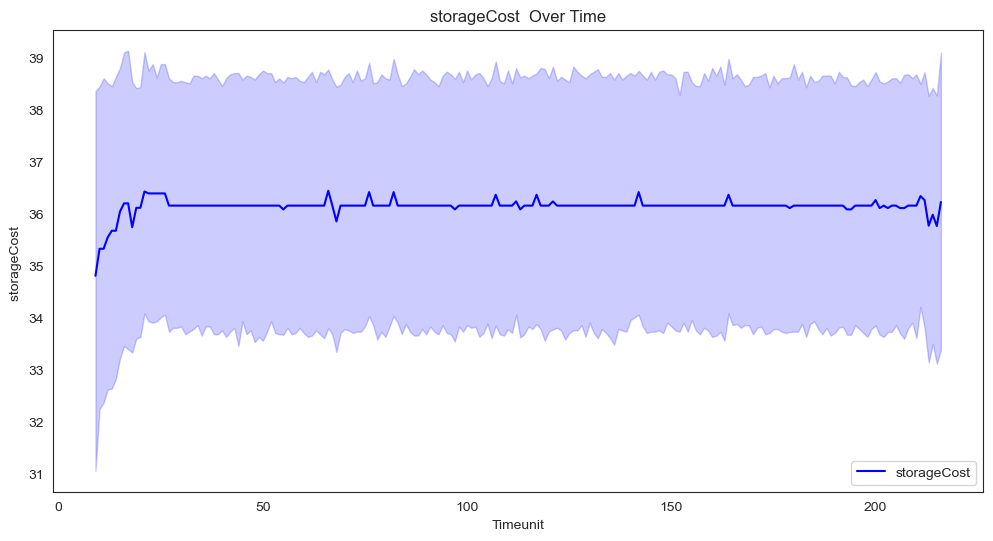

In [30]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_train, x='timeunit', y='storageCost', label='storageCost', color='blue')
 
# Adding labels and title
plt.xlabel('Timeunit')
plt.ylabel('storageCost ')
plt.title('storageCost  Over Time')
 
plt.show()

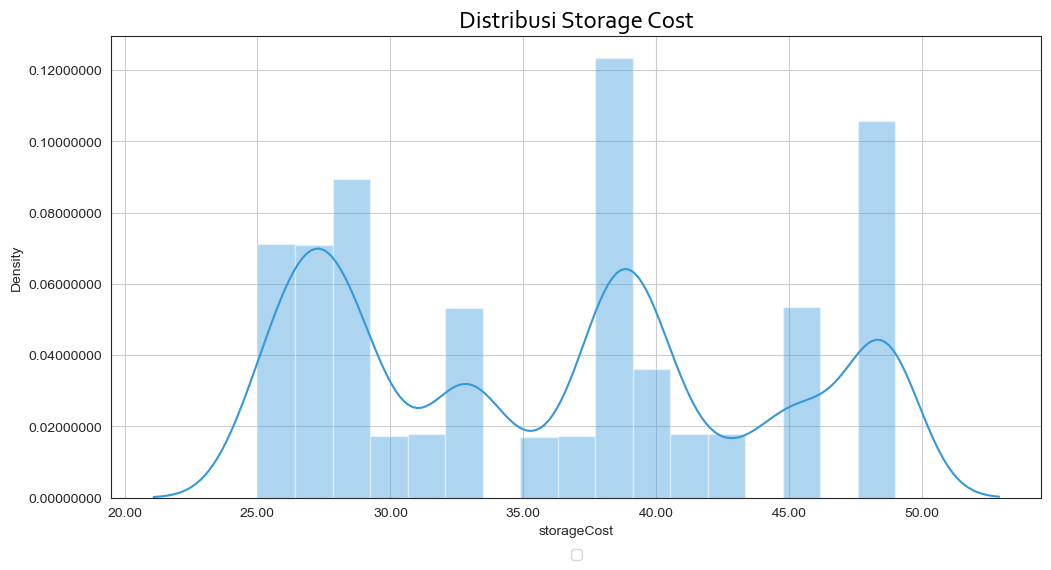

In [31]:
 plot_hist(df_train, 'storageCost', 'Storage Cost', 'Distribusi Storage Cost', kde=True, save=False)

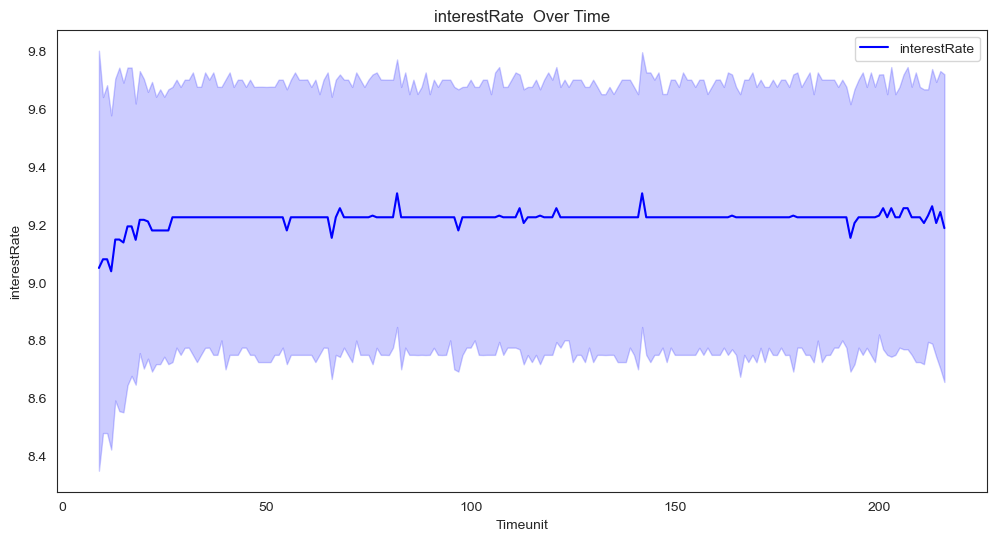

In [32]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_train, x='timeunit', y='interestRate', label='interestRate', color='blue')
 
# Adding labels and title
plt.xlabel('Timeunit')
plt.ylabel('interestRate')
plt.title('interestRate  Over Time')
 
plt.show()

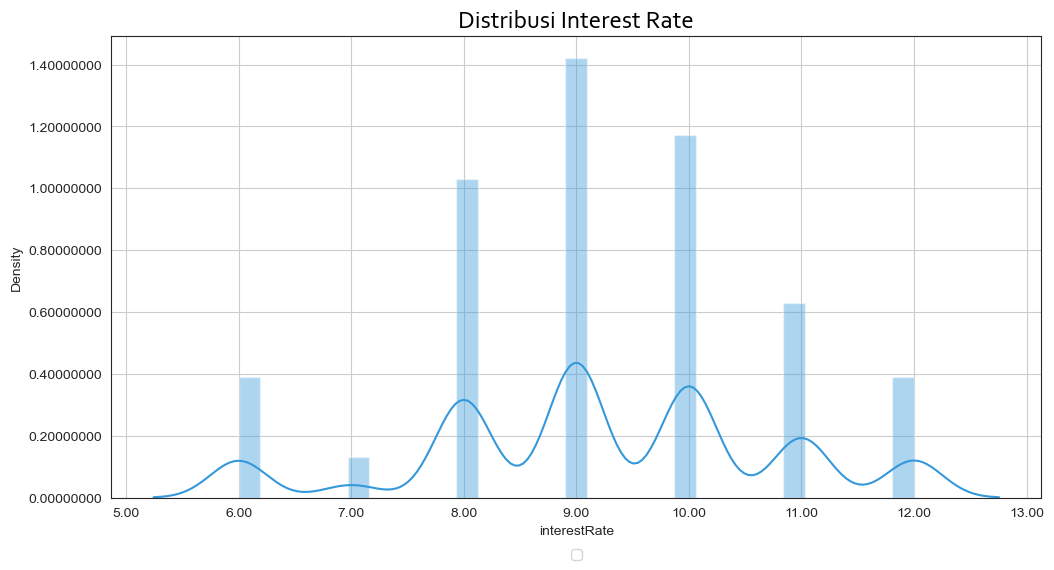

In [33]:
 plot_hist(df_train, 'interestRate', 'Interest Rate', 'Distribusi Interest Rate', kde=True, save=False)

In [34]:
df_train['interaction_terms']=df_train['storageCost']*df_train['interestRate']

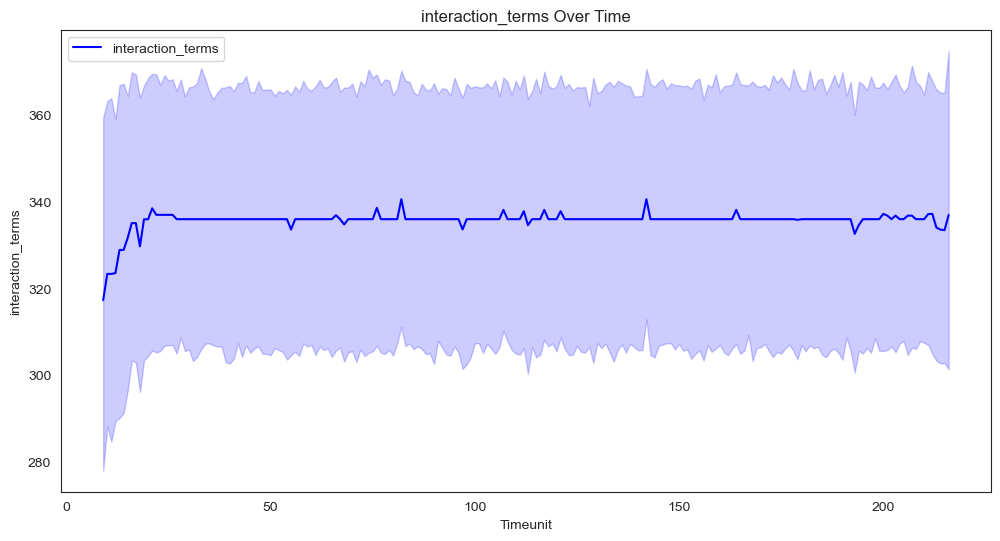

In [35]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_train, x='timeunit', y='interaction_terms', label='interaction_terms', color='blue')
 
# Adding labels and title
plt.xlabel('Timeunit')
plt.ylabel('interaction_terms')
plt.title('interaction_terms Over Time')

plt.show()

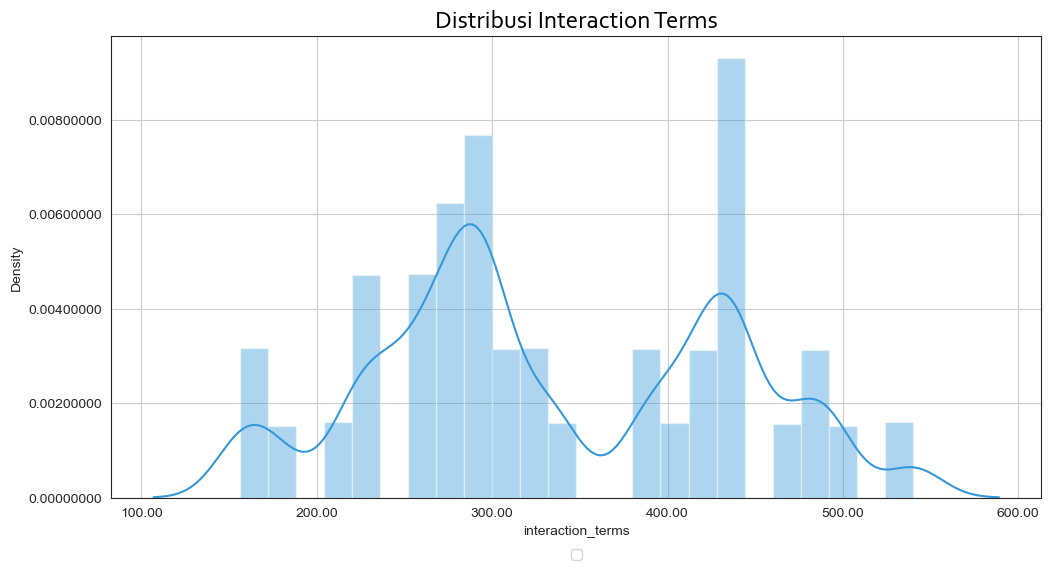

In [36]:
 plot_hist(df_train, 'interaction_terms', 'Interaction Terms', 'Distribusi Interaction Terms', kde=True, save=False)

## LBL + MLTp

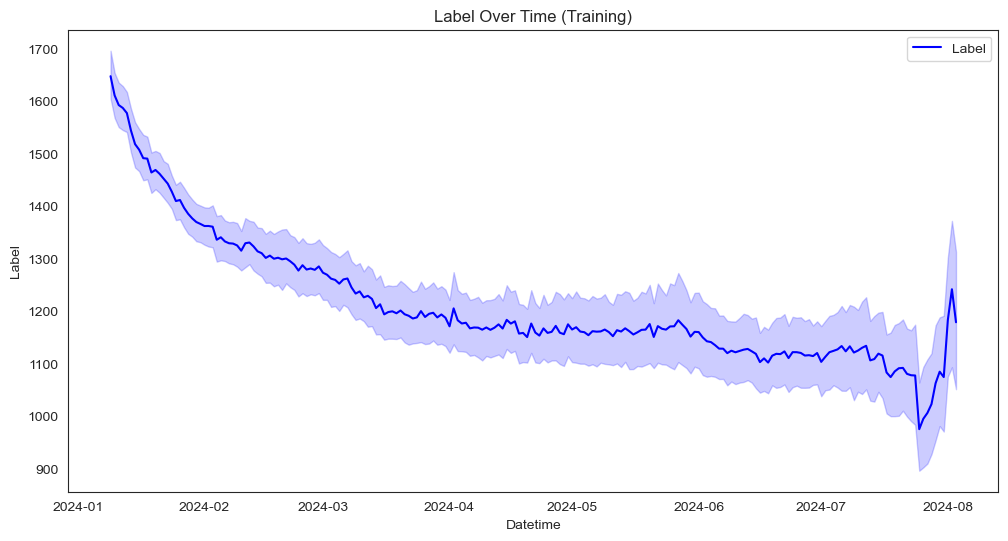

In [37]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_train, x='datetime', y='LBL', label='Label', color='blue')
 
# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Label')
plt.title('Label Over Time (Training)')
 
plt.show()

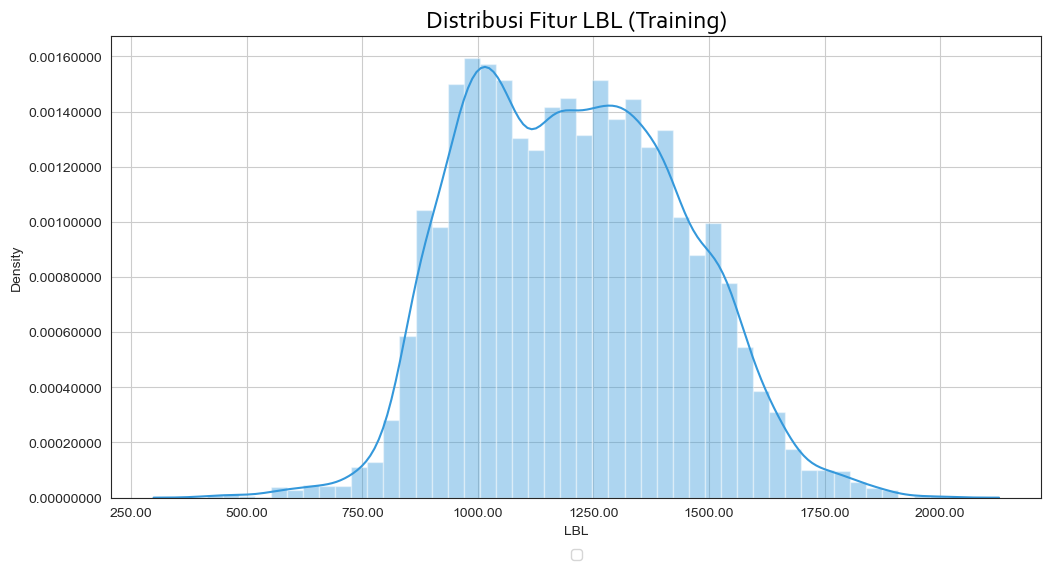

In [41]:
 plot_hist(df_train, 'LBL', 'Label', 'Distribusi Fitur LBL (Training)', kde=True, save=False)

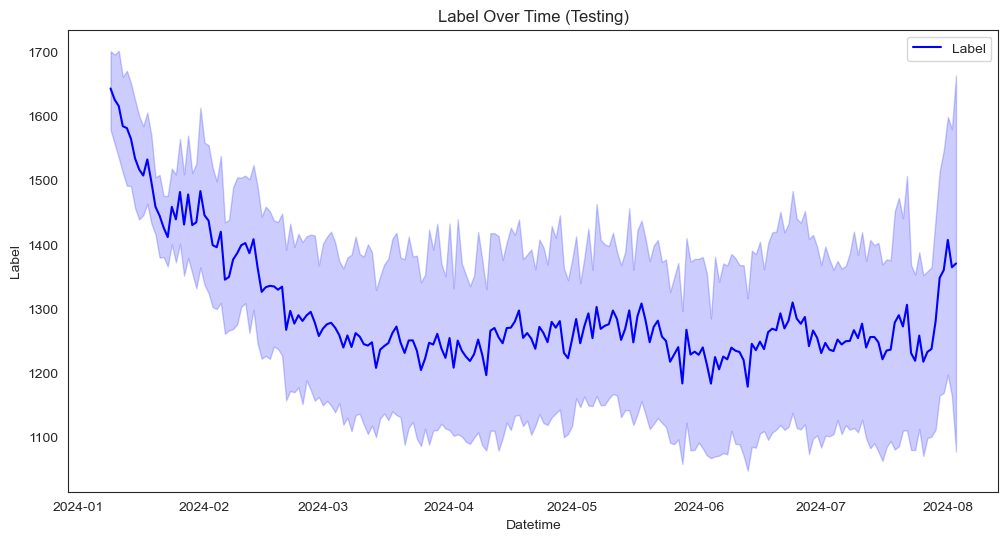

In [38]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_test, x='datetime', y='LBL', label='Label', color='blue')
 
# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Label')
plt.title('Label Over Time (Testing)')
 
plt.show()

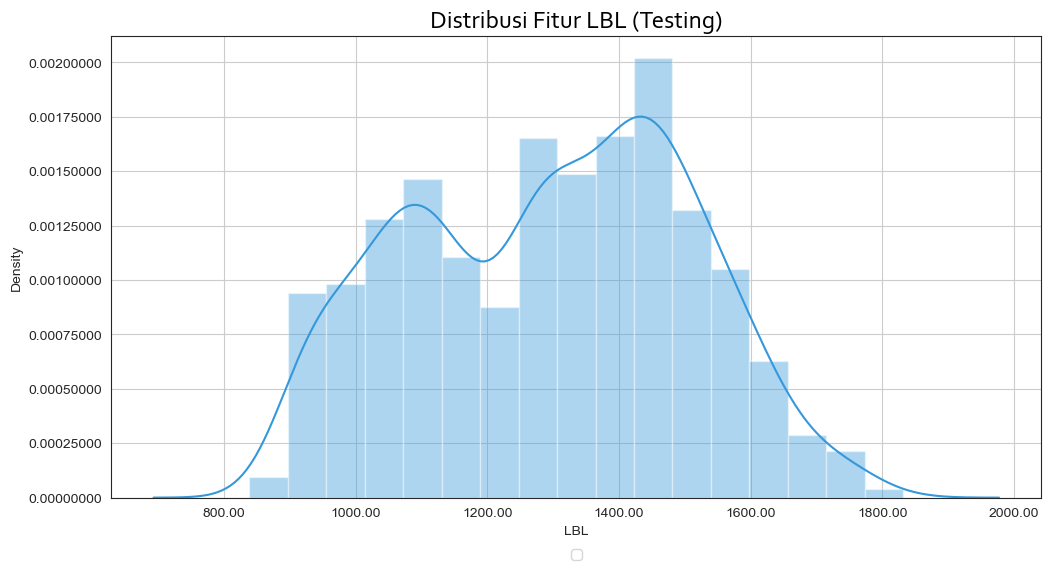

In [42]:
 plot_hist(df_test, 'LBL', 'Label', 'Distribusi Fitur LBL (Testing)', kde=True, save=False)

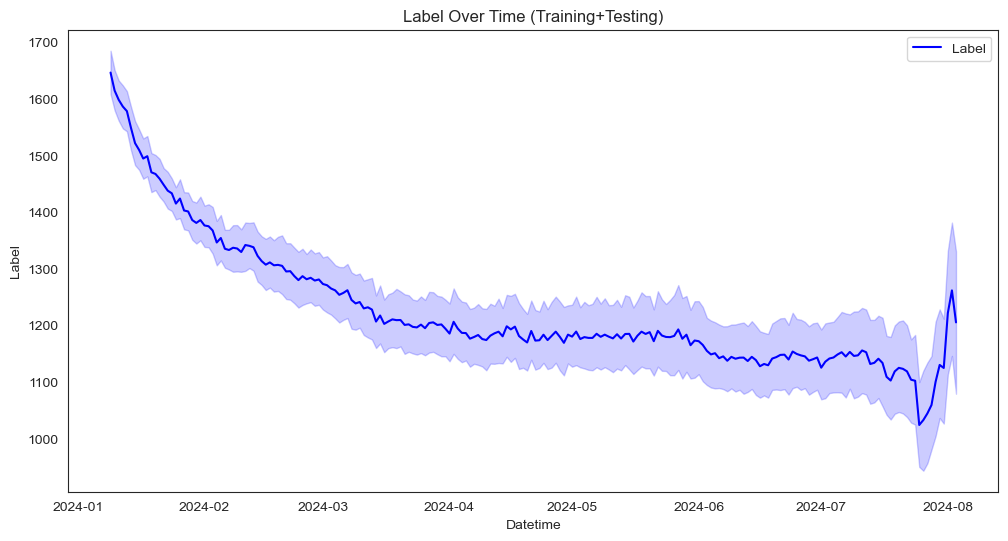

In [39]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_all, x='datetime', y='LBL', label='Label', color='blue')
 
# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Label')
plt.title('Label Over Time (Training+Testing)')
 
plt.show()

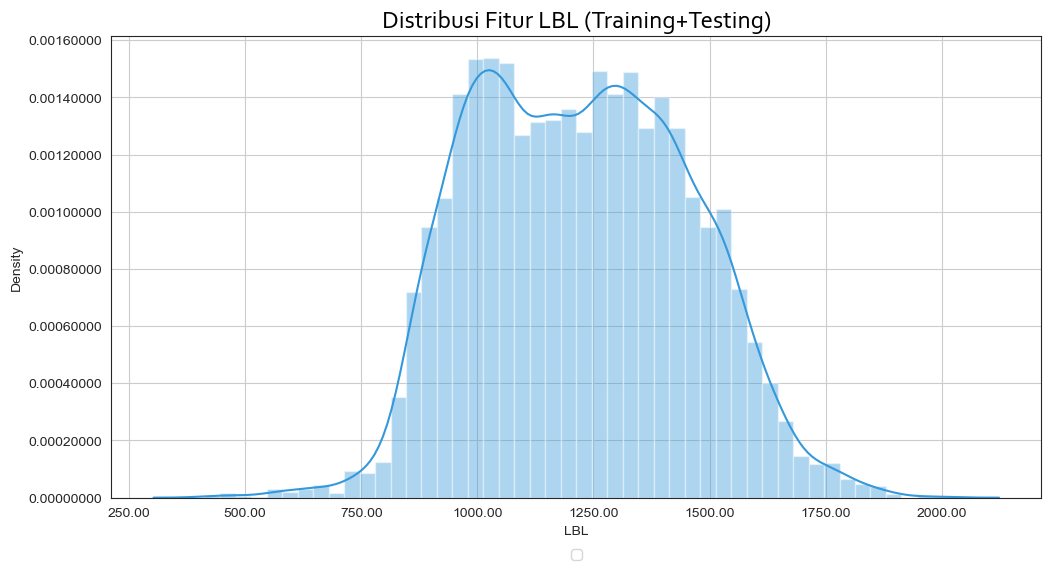

In [43]:
 plot_hist(df_all, 'LBL', 'Label', 'Distribusi Fitur LBL (Training+Testing)', kde=True, save=False)

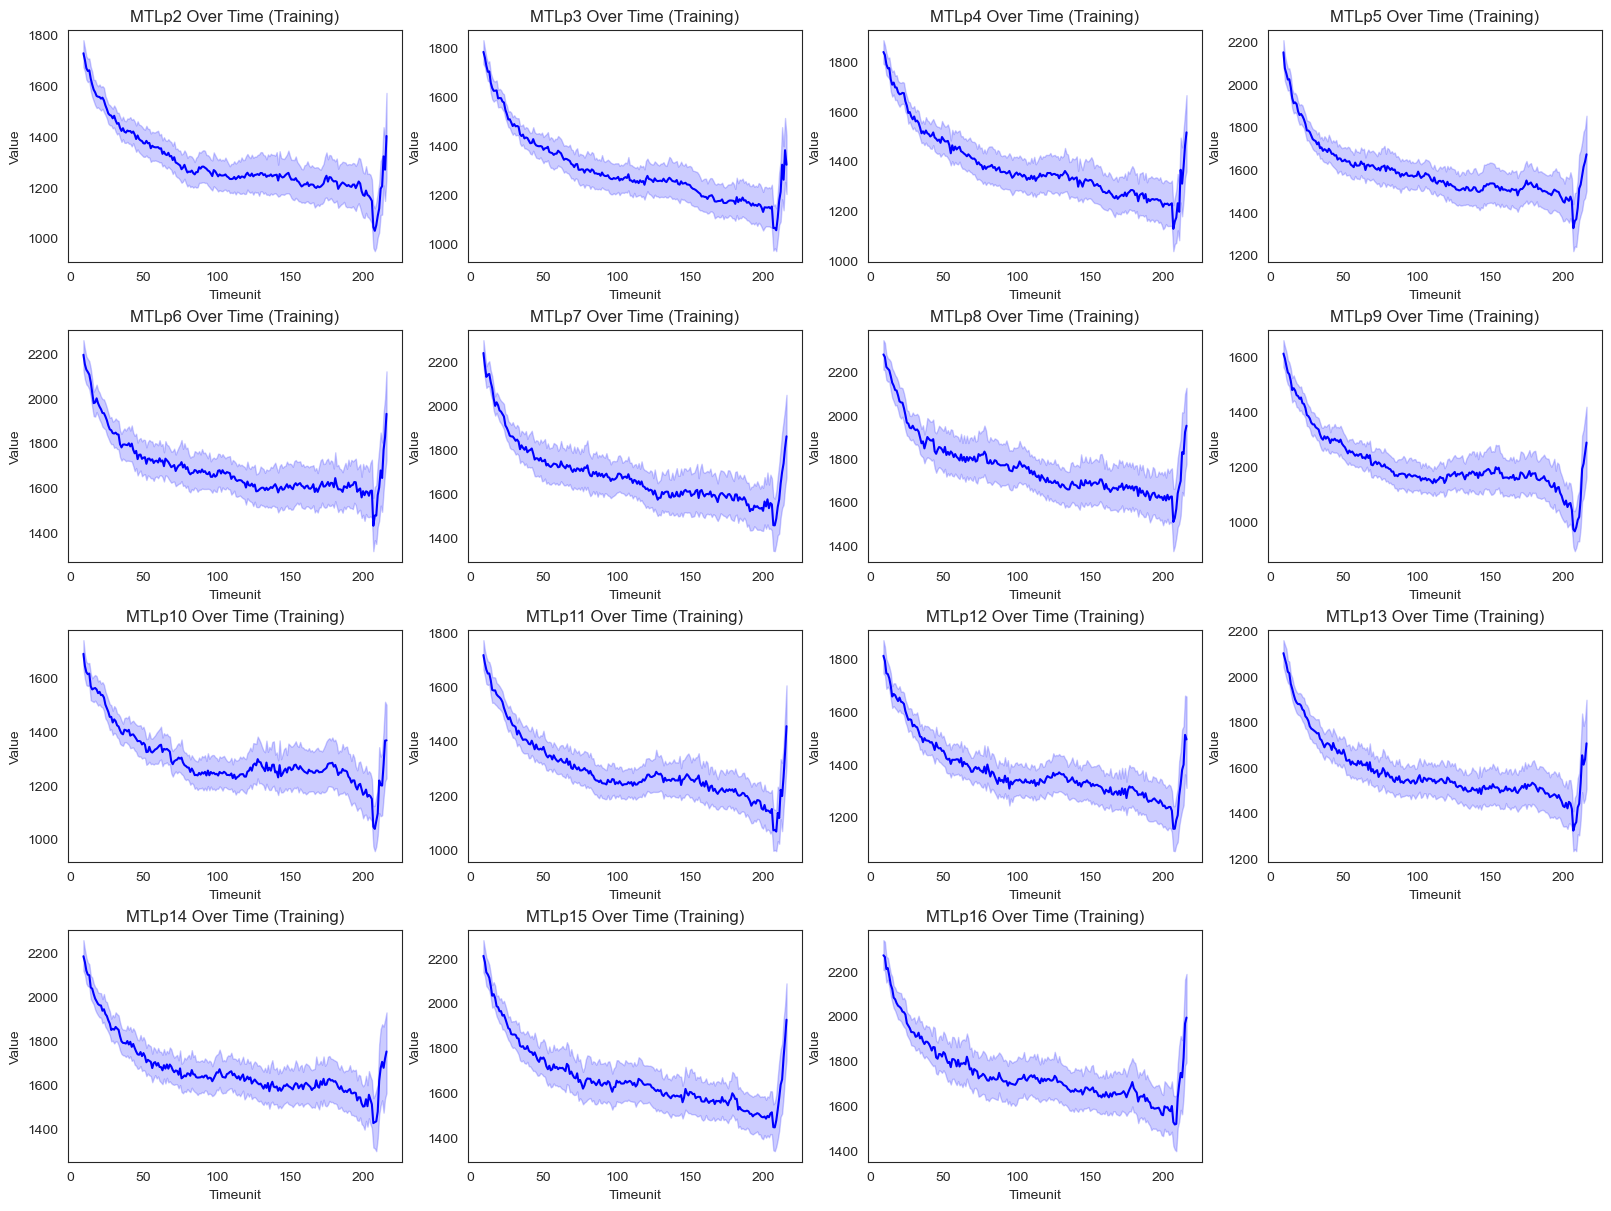

In [44]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(MTLp) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(MTLp):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Over Time (Training)")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(MTLp), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

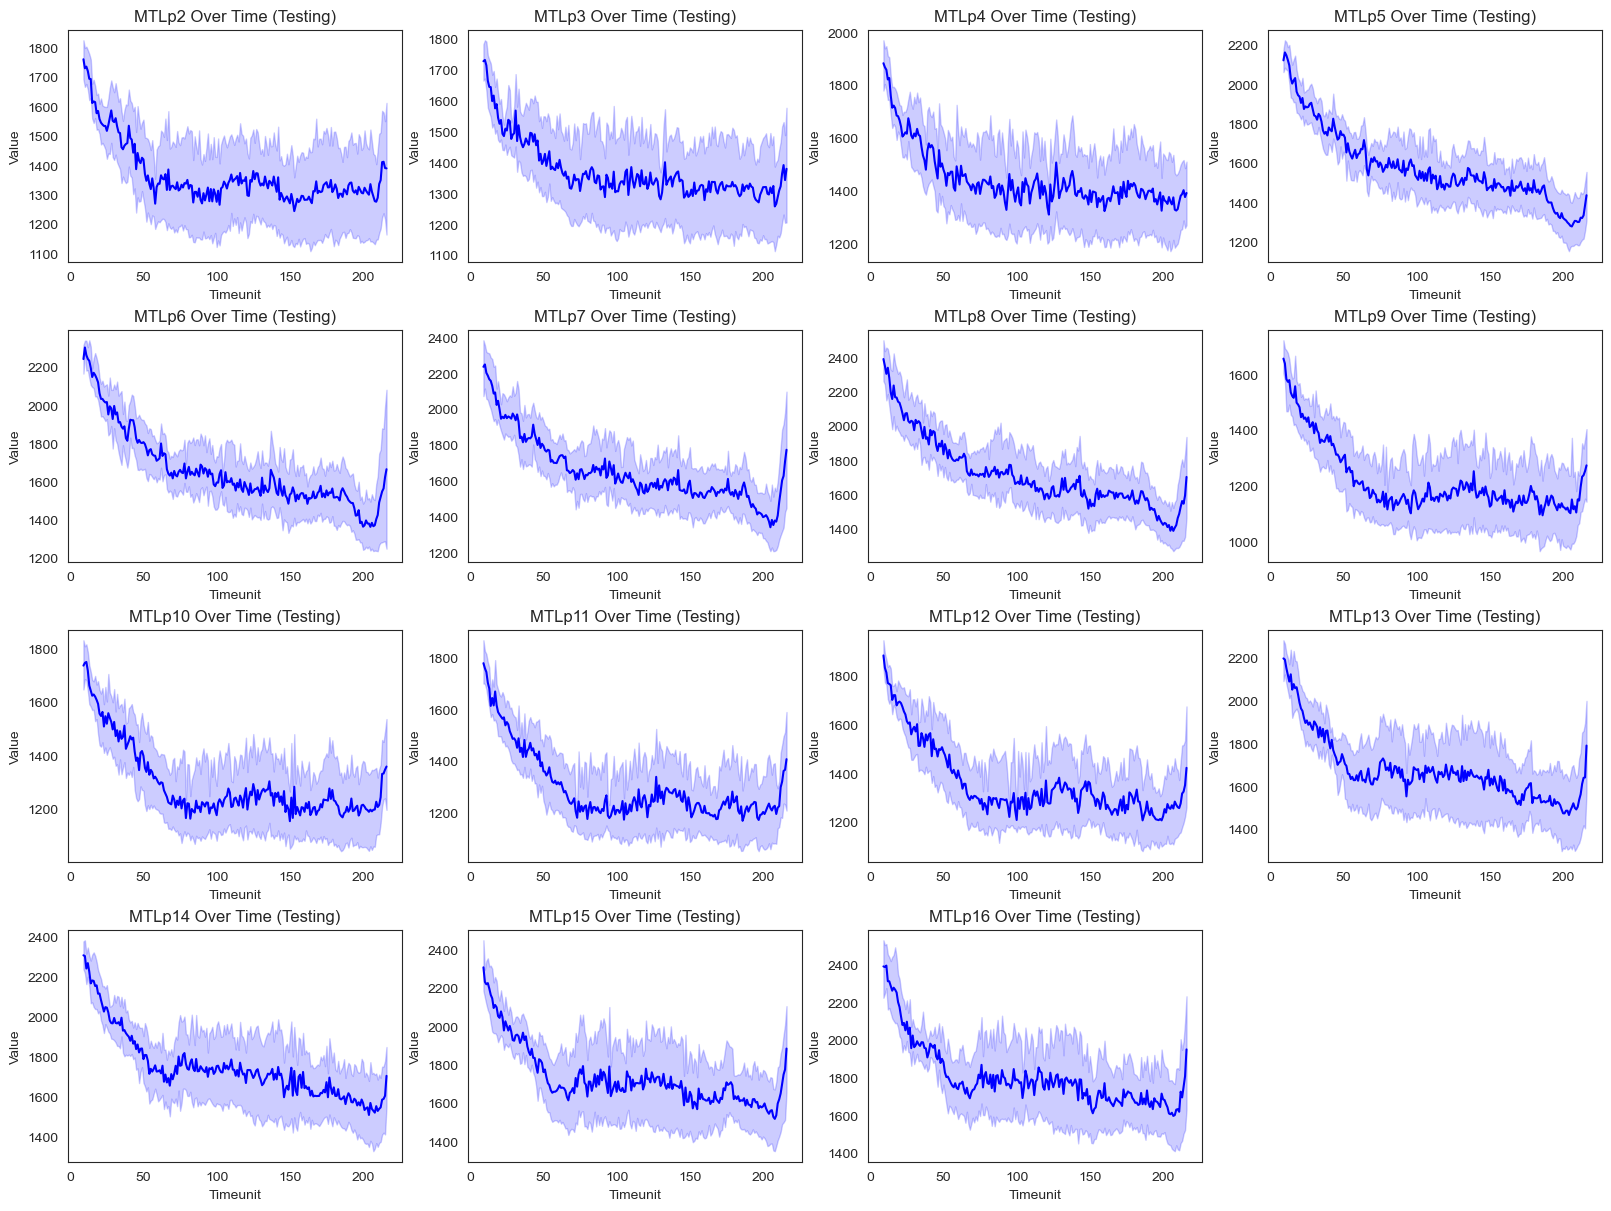

In [50]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(MTLp) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(MTLp):
    sns.lineplot(data=df_test, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Over Time (Testing)")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(MTLp), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

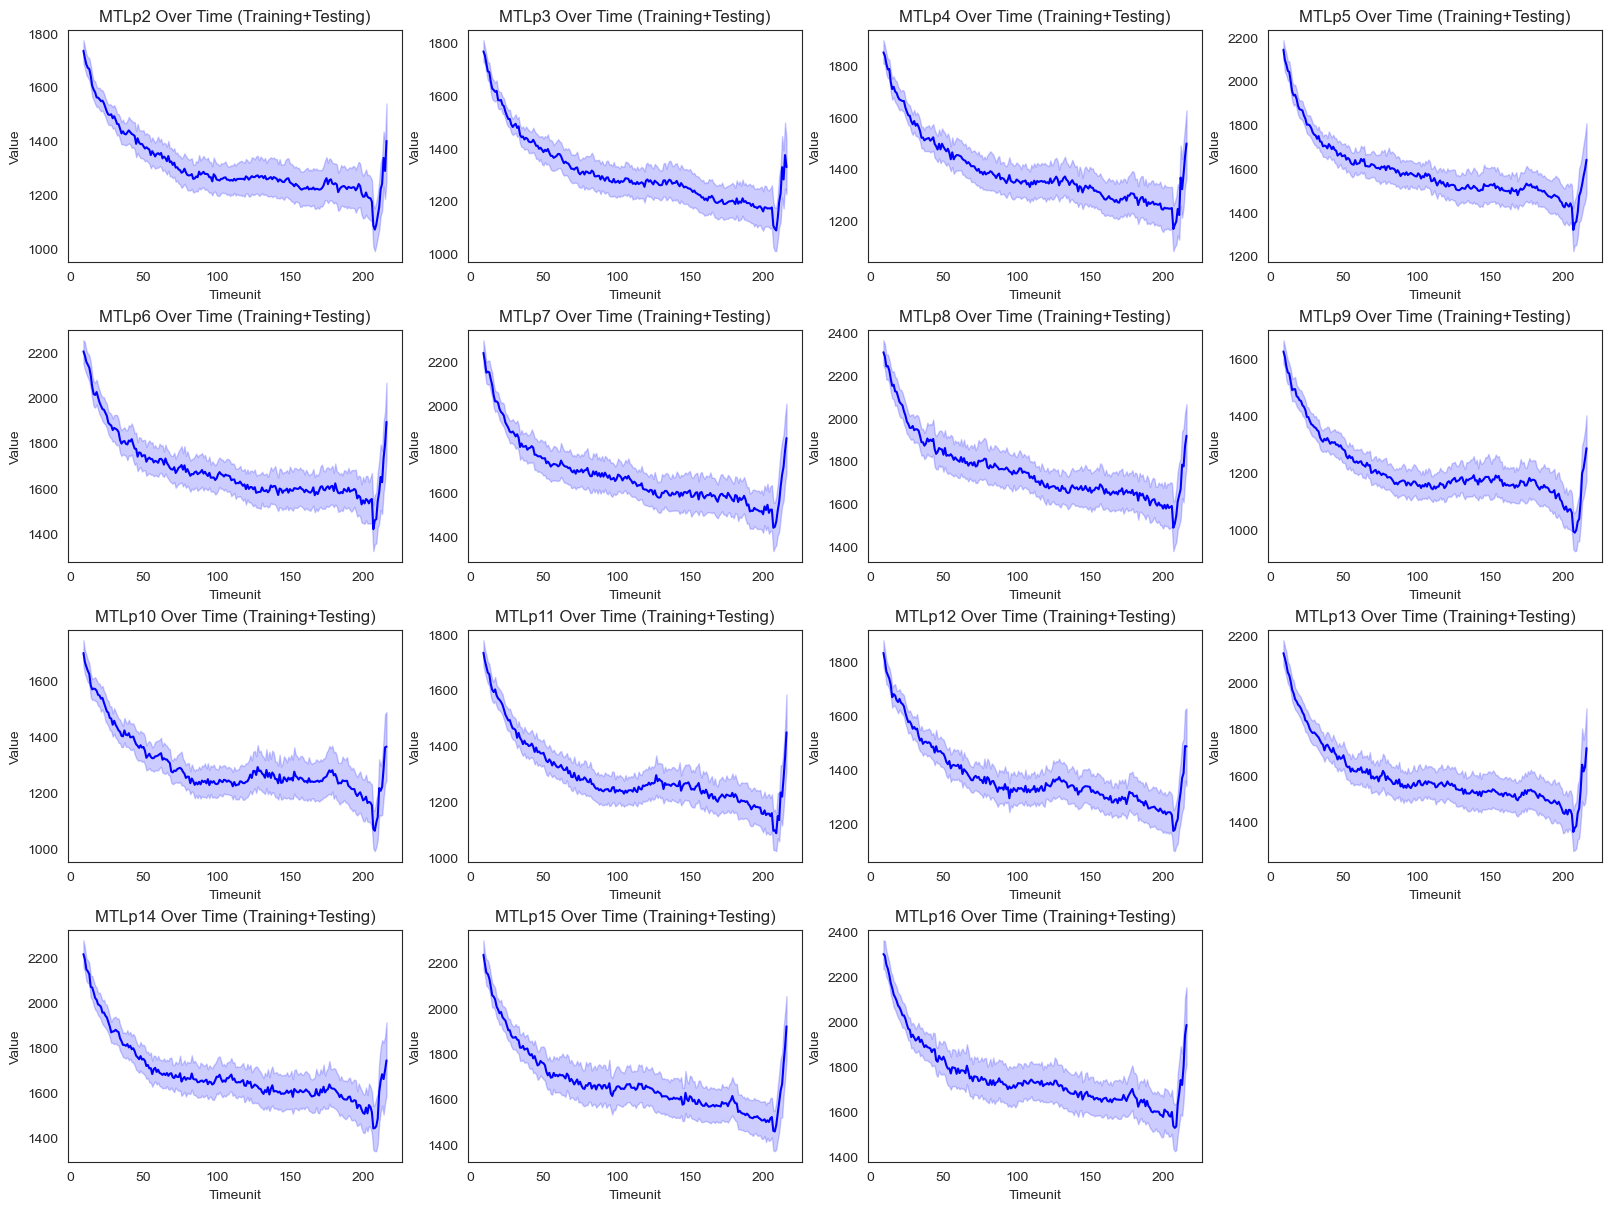

In [51]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(MTLp) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(MTLp):
    sns.lineplot(data=df_all, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Over Time (Training+Testing)")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(MTLp), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

## Compidx

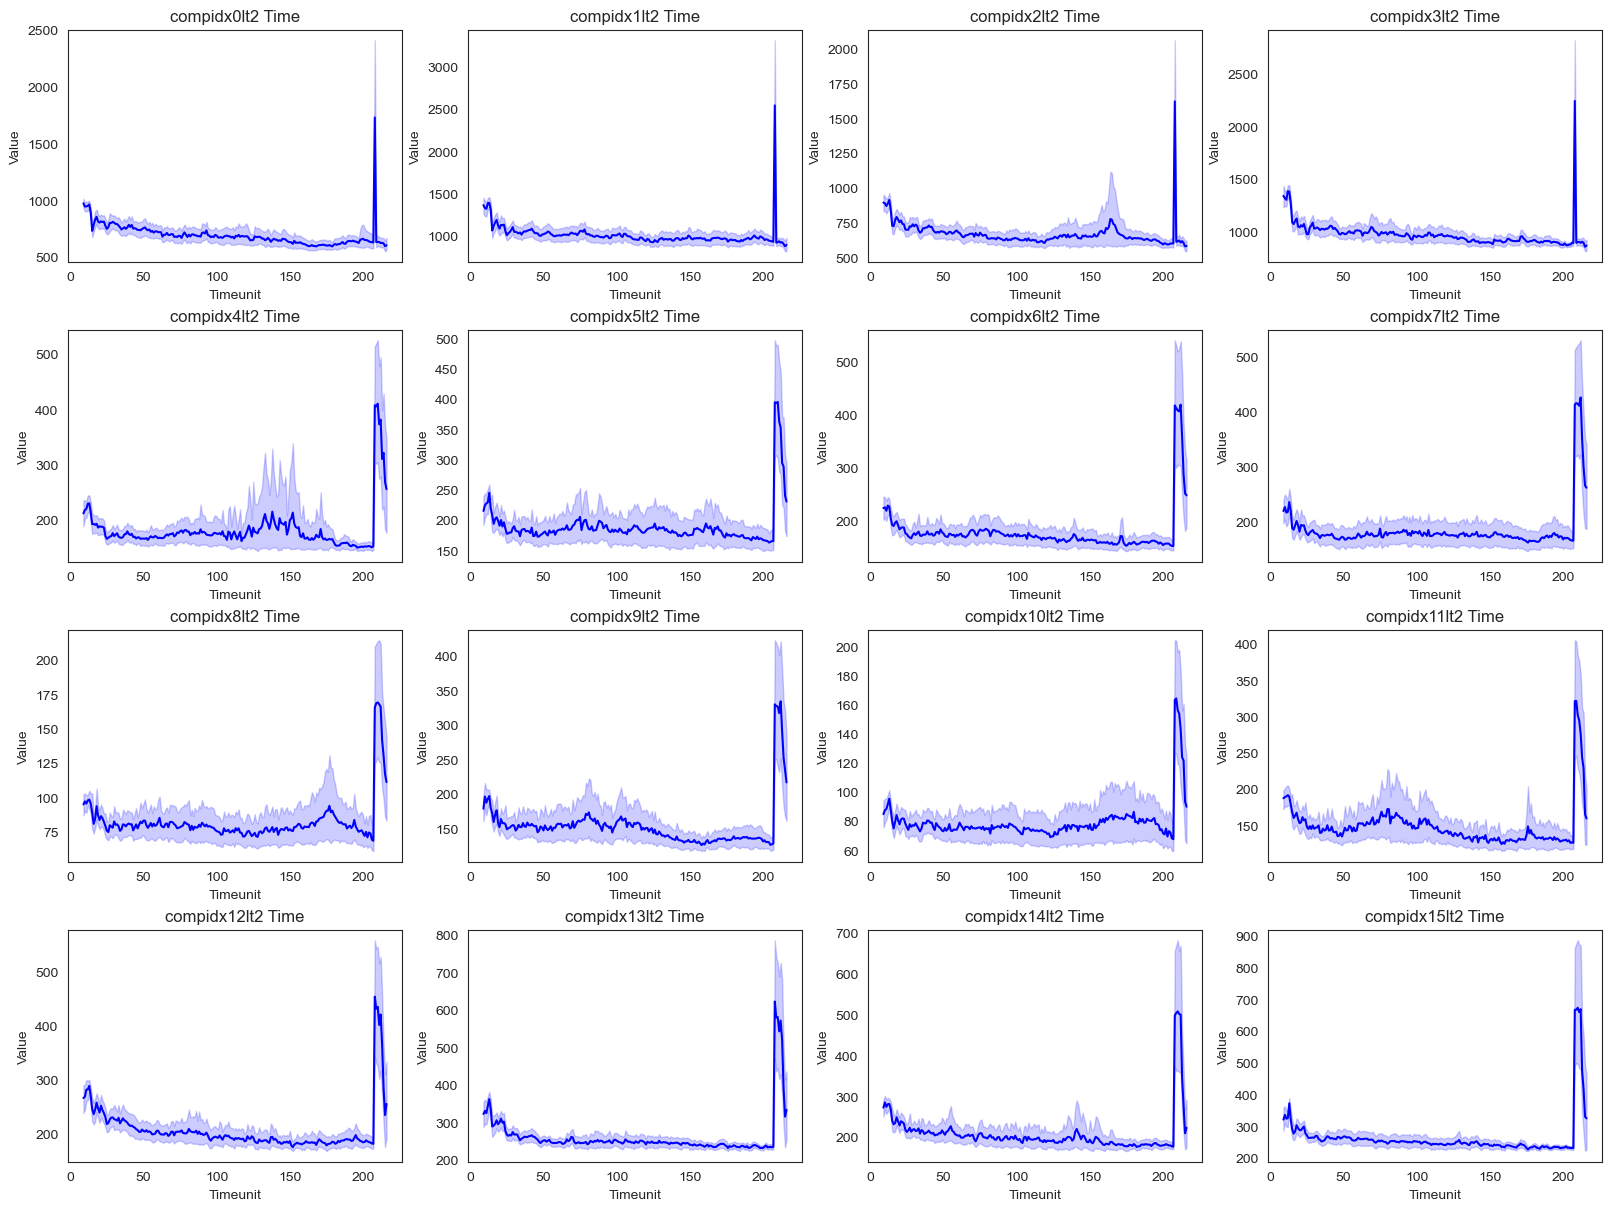

In [46]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(compidx_lt2) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(compidx_lt2):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Time")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(compidx_lt2), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

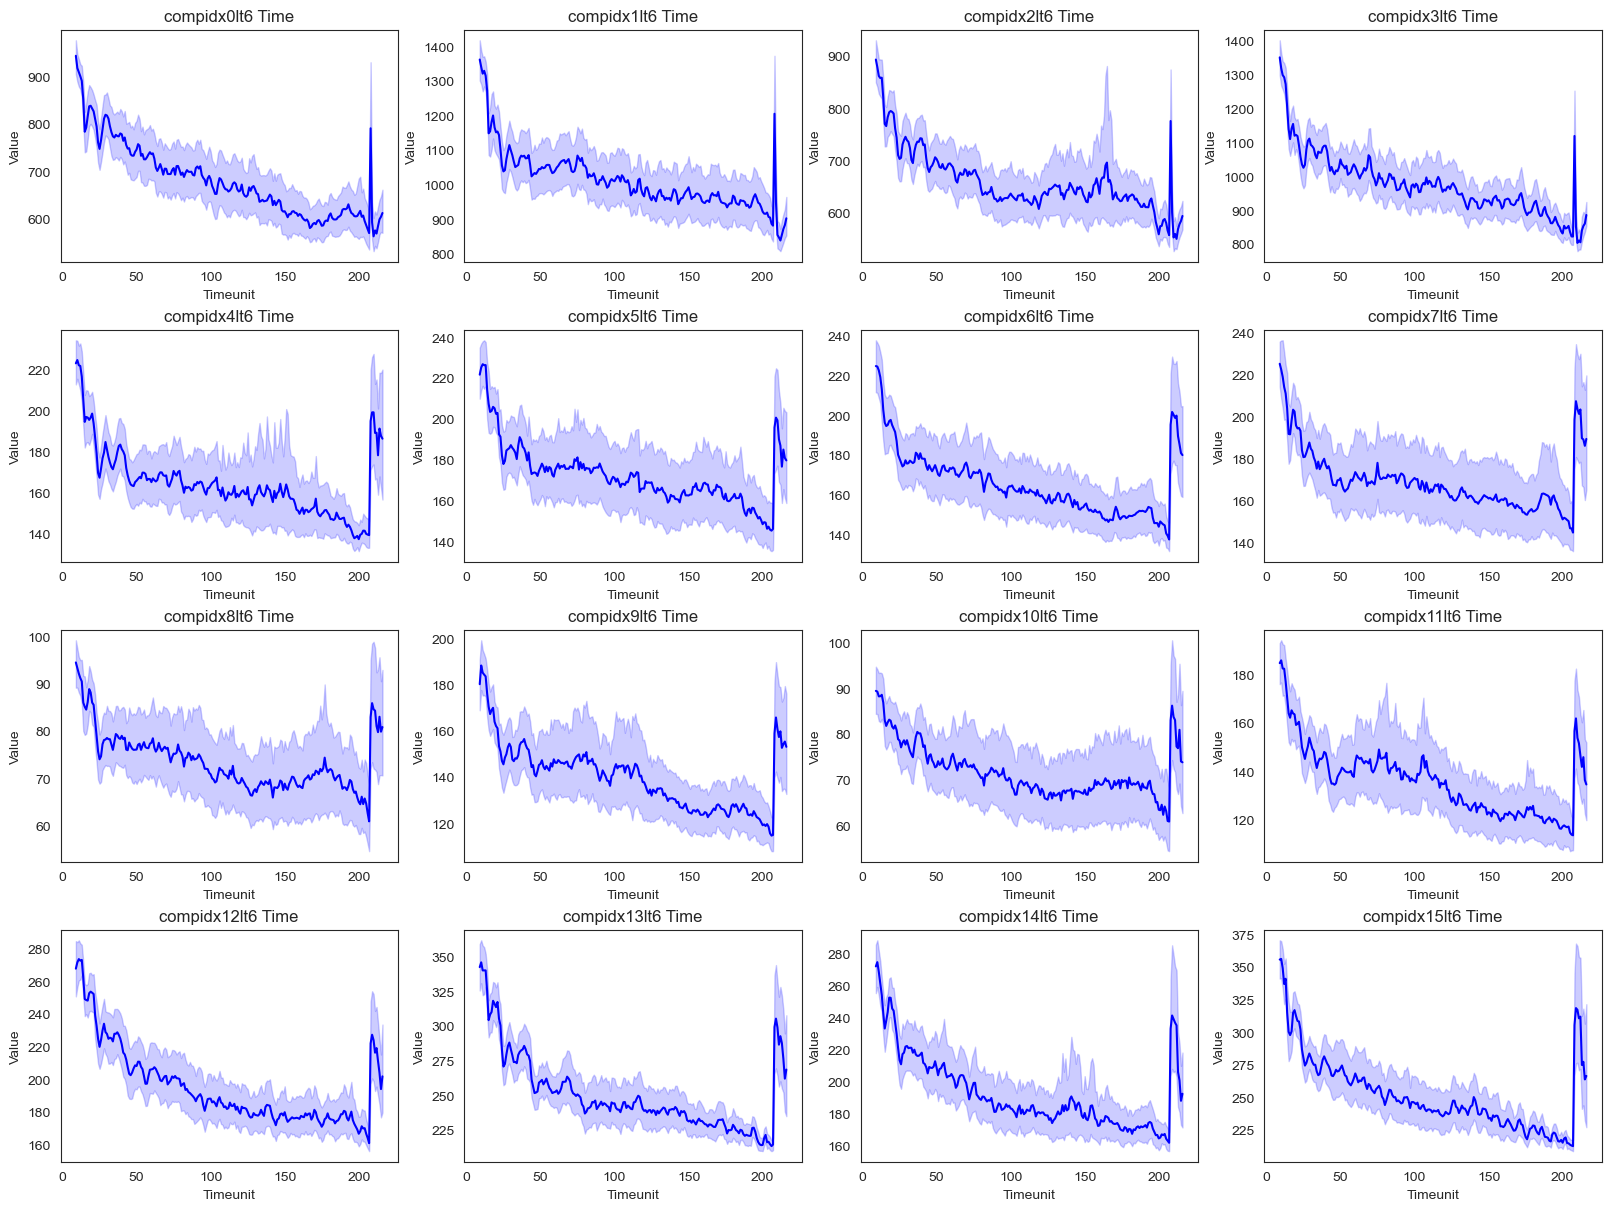

In [47]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(compidx_lt6) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(compidx_lt6):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Time")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(compidx_lt6), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

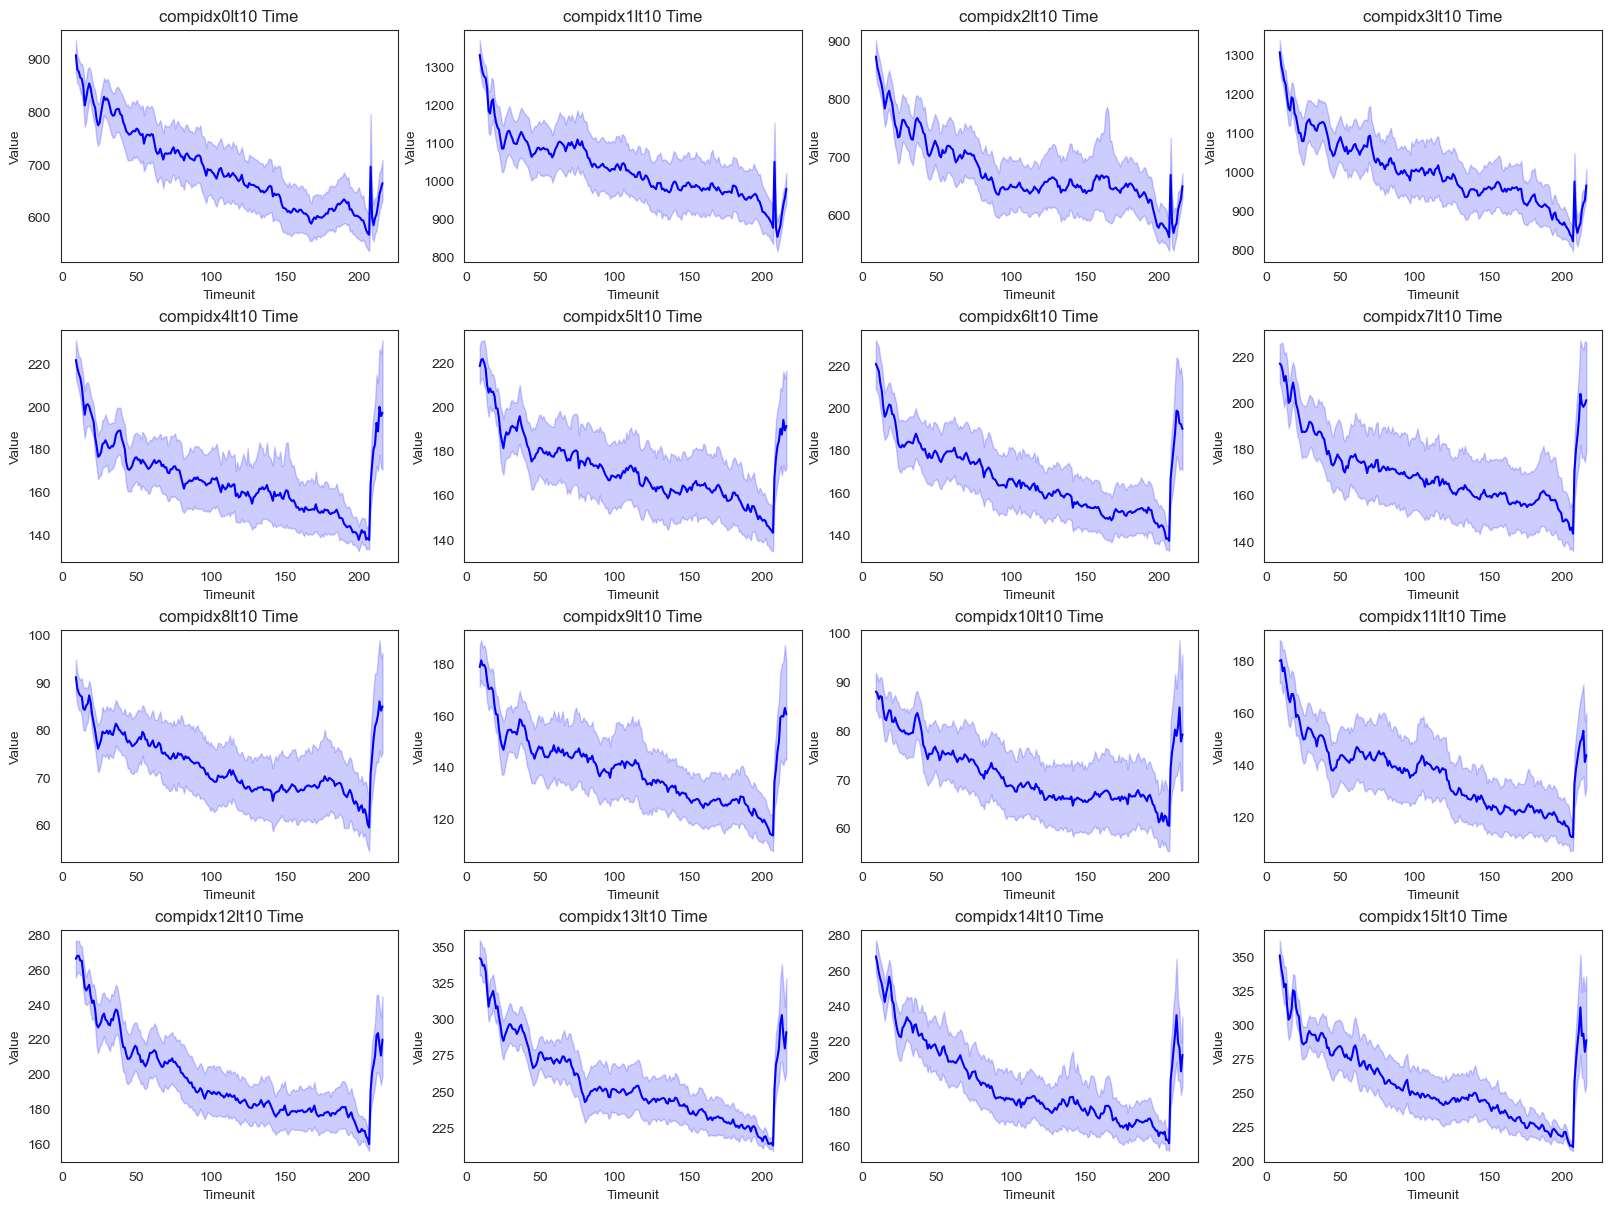

In [48]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(compidx_lt10) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(compidx_lt10):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Time")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(compidx_lt10), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

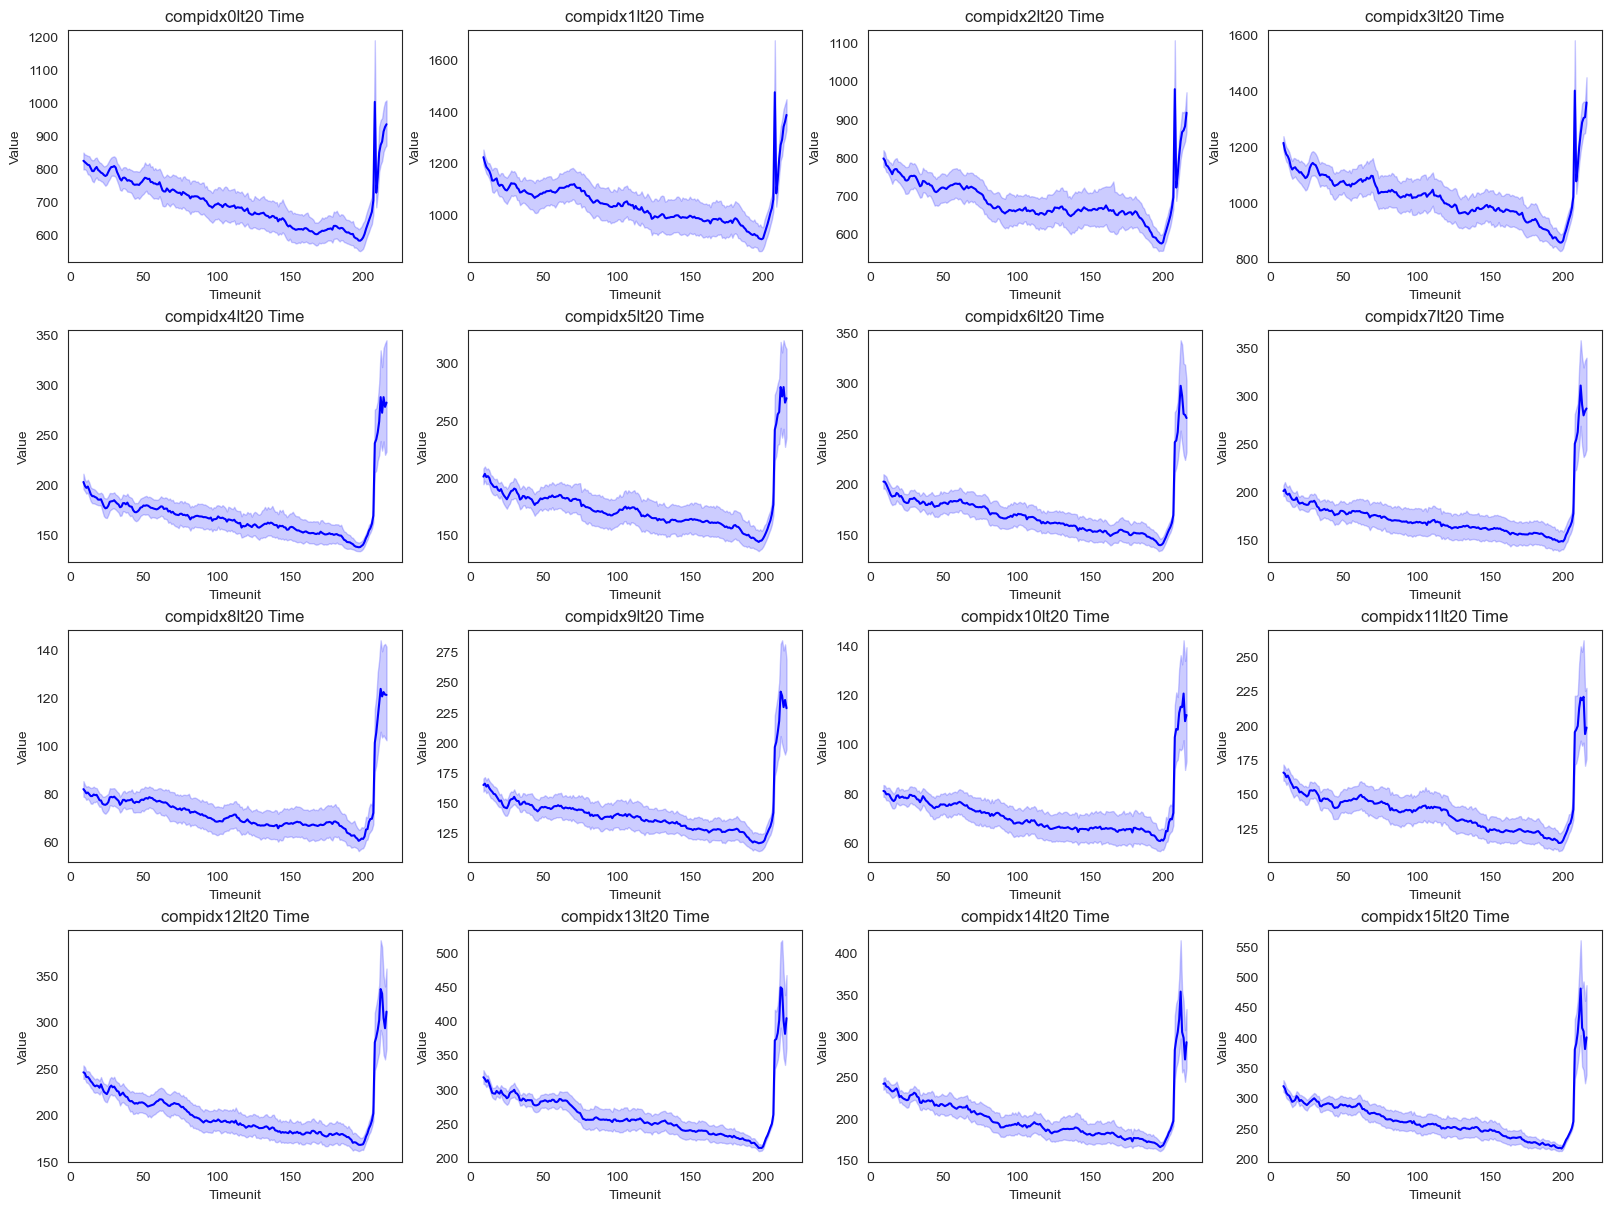

In [52]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(compidx_lt20) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(compidx_lt20):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Time")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(compidx_lt20), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

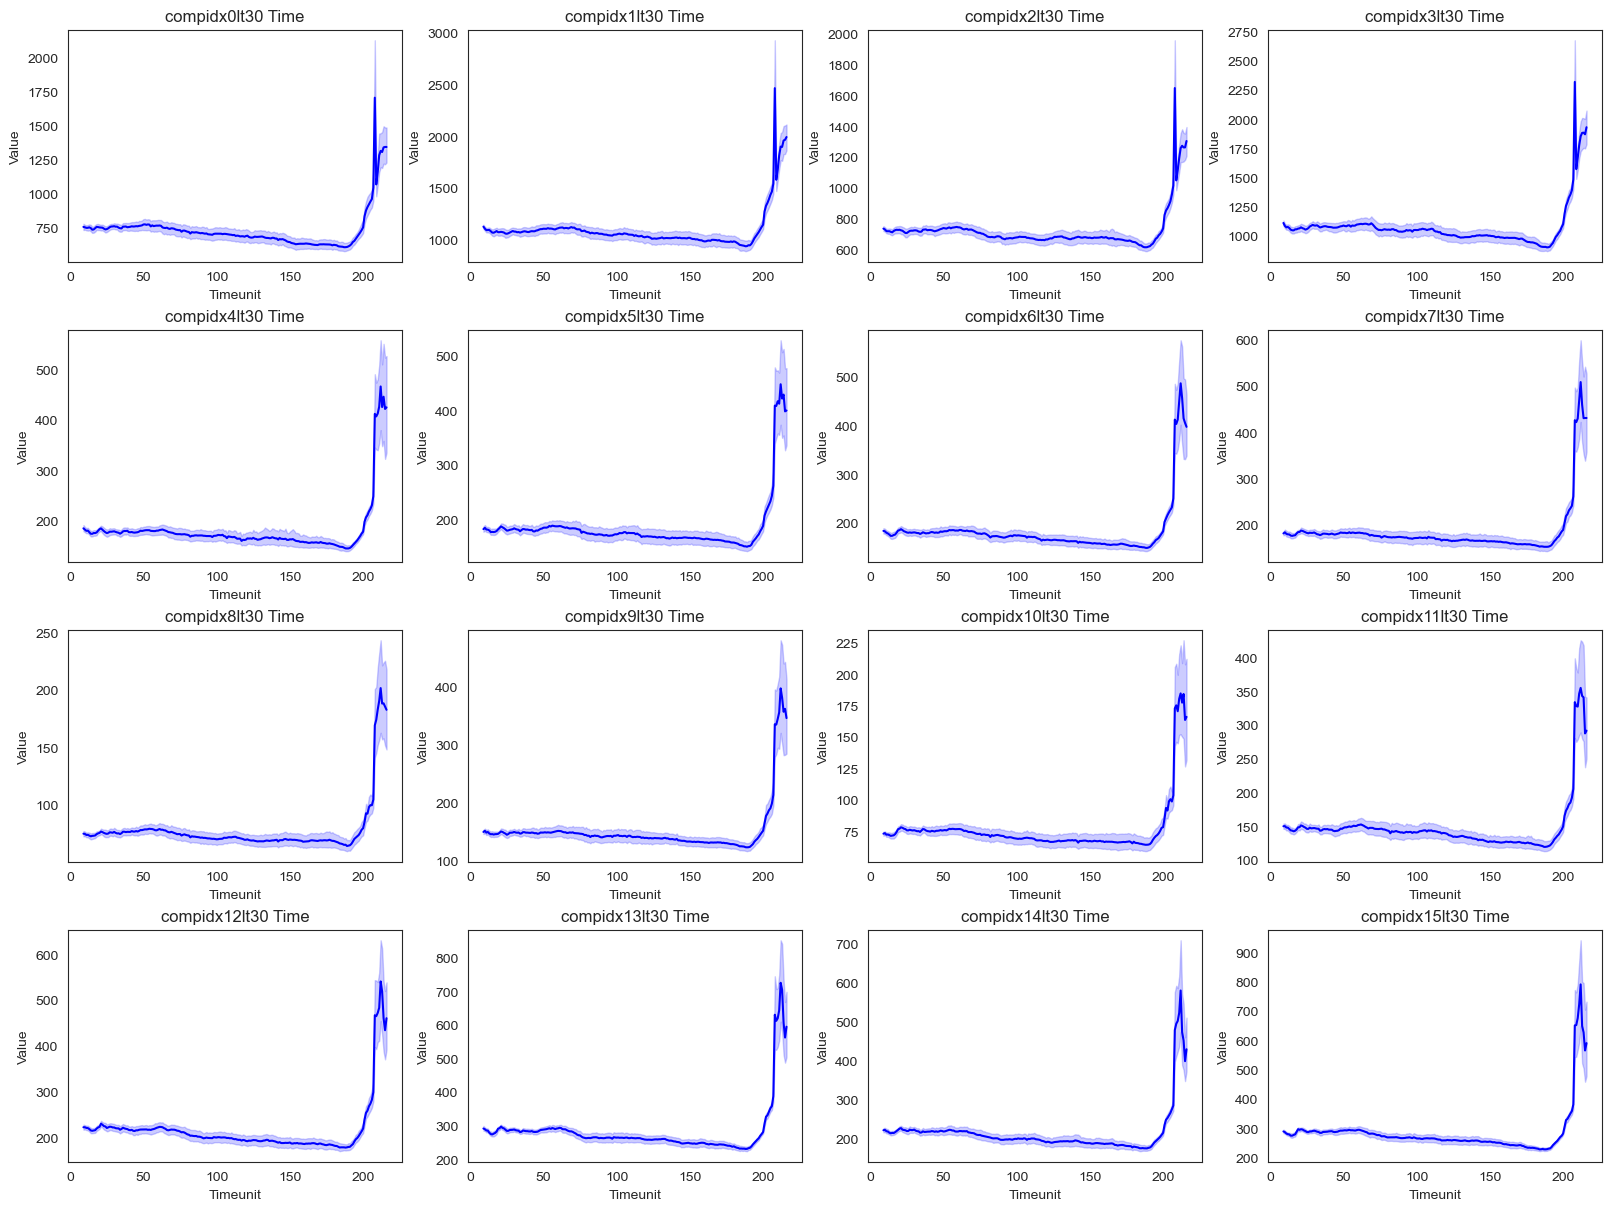

In [53]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(compidx_lt30) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(compidx_lt30):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Time")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(compidx_lt30), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

## SKU 

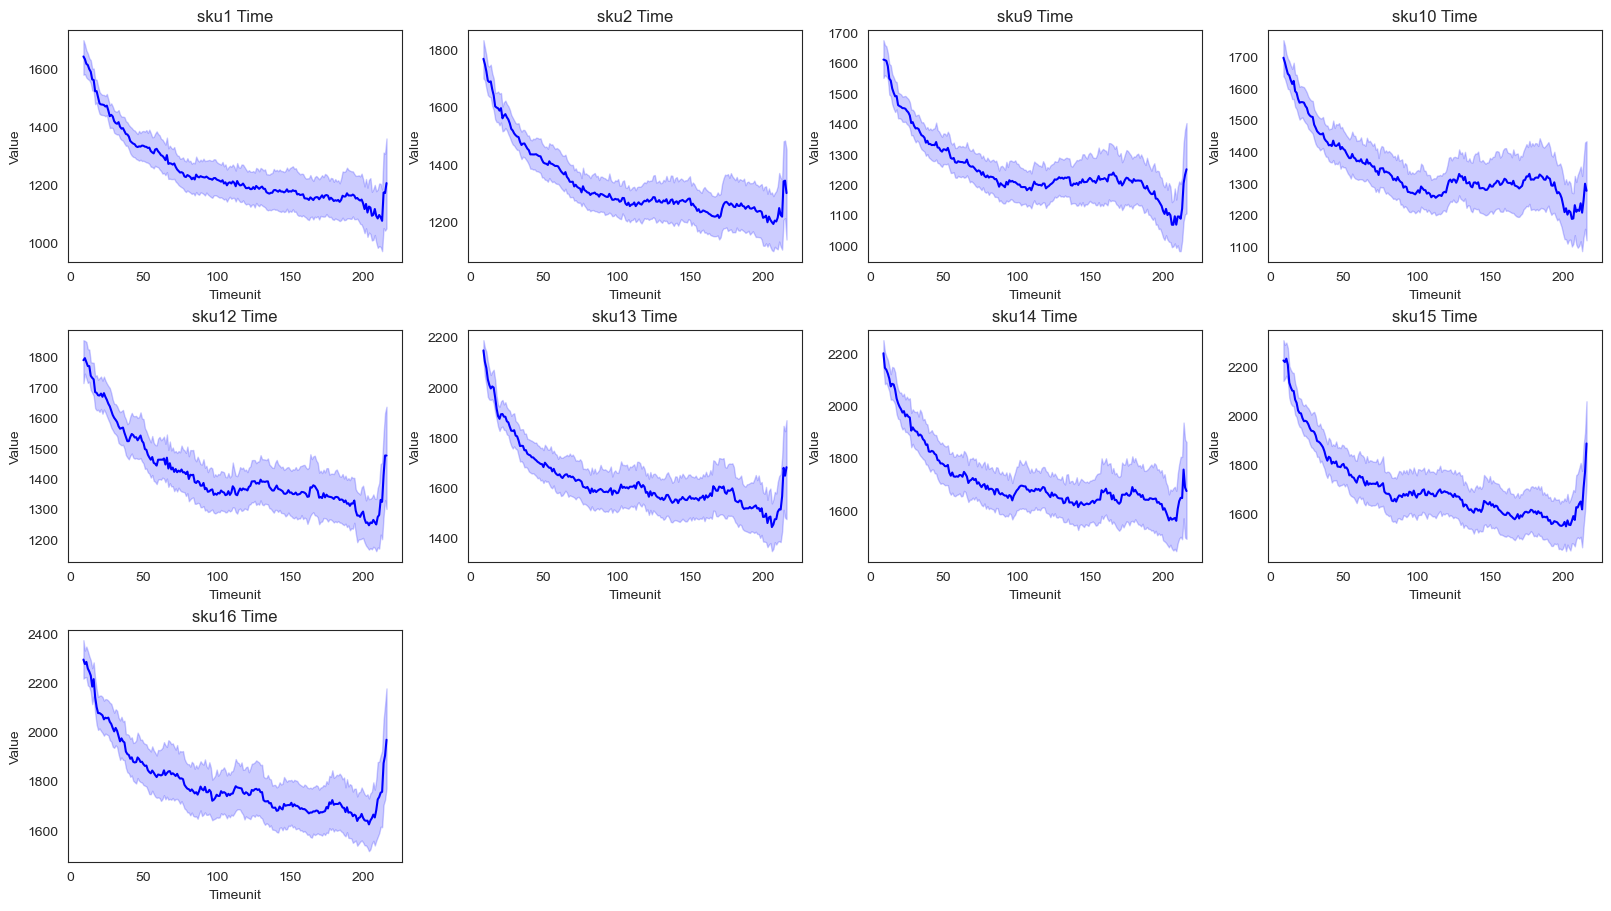

In [54]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = -(-len(sku) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(sku):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Time")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(sku), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

## Demandseg

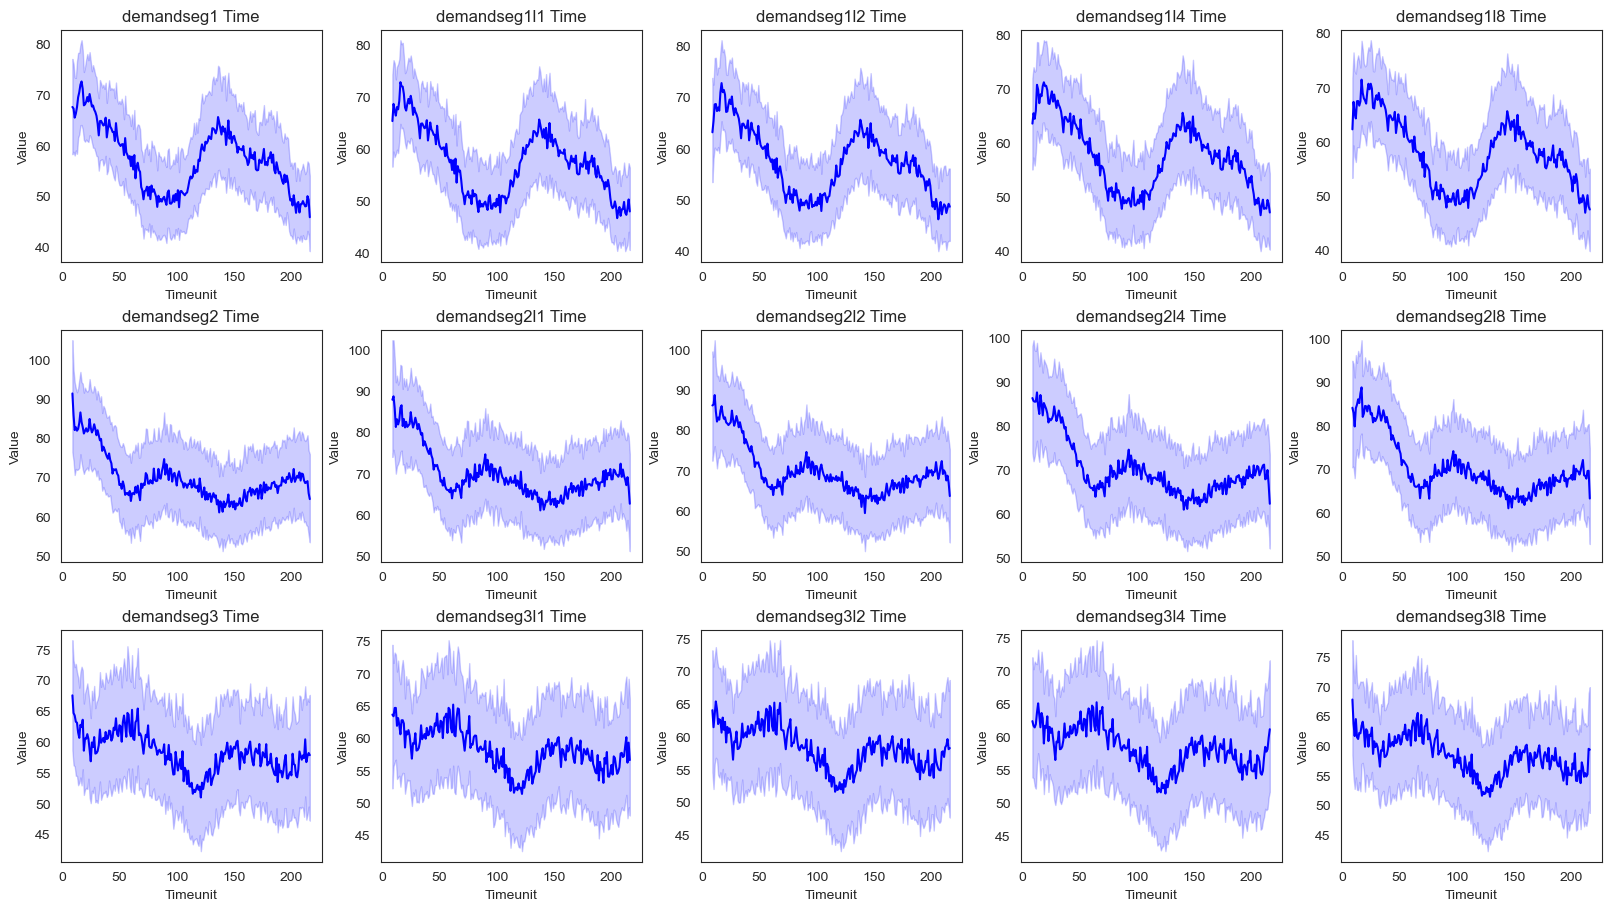

In [55]:
# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns
n_rows = -(-len(demandseg_all) // n_cols)  # Calculate rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each line in a subplot
for idx, col in enumerate(demandseg_all):
    sns.lineplot(data=df_train, x='timeunit', y=col, ax=axes[idx], color='blue')
    axes[idx].set_title(f"{col} Time")
    axes[idx].set_xlabel("Timeunit")
    axes[idx].set_ylabel("Value")

# Remove any unused subplots
for idx in range(len(demandseg_all), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.show()

# Modelling

## Split Dataset

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target
features = ['storageCost', 'interestRate', 'compidx0lt2', 'sku1', 'demandseg1', 'timeunit']
X = df_train[features]
y = df_train['LBL']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

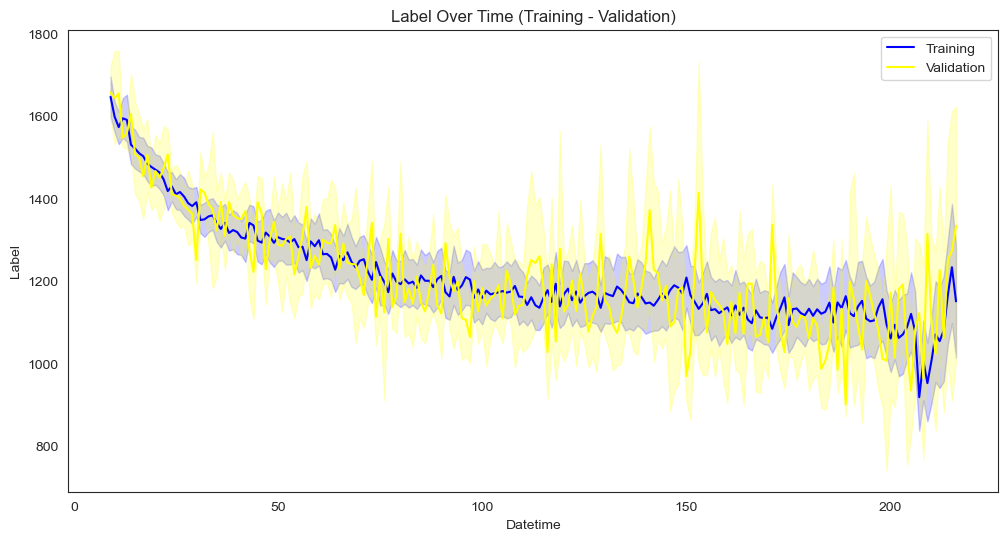

In [63]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(x=X_train['timeunit'], y=y_train, label='Training', color='blue')
sns.lineplot(x=X_val['timeunit'], y=y_val, label='Validation', color='yellow')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Label')
plt.title('Label Over Time (Training - Validation)')
 
plt.show()

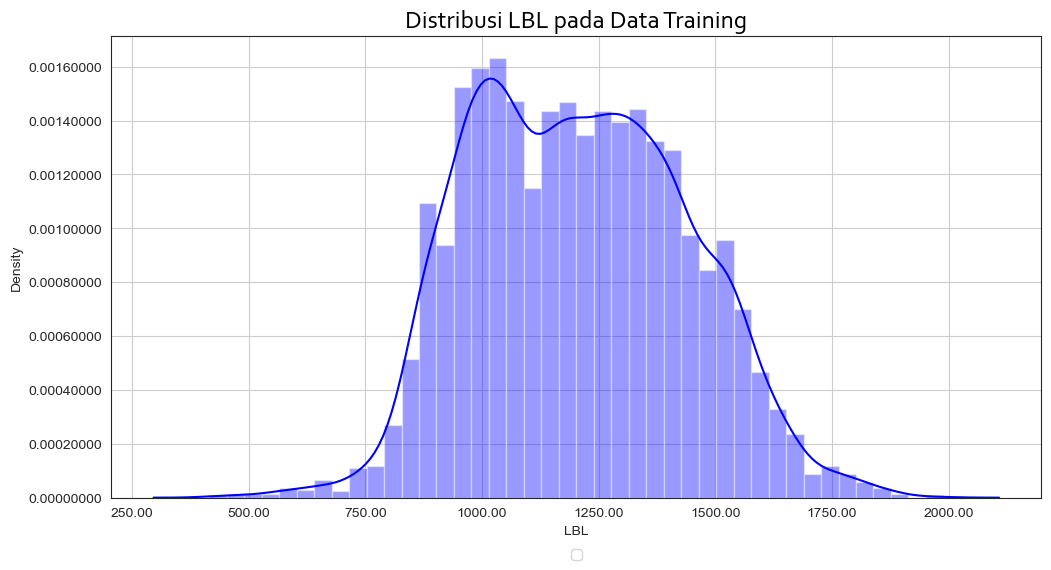

In [67]:
plt.figure(figsize=(12, 6))
sea_plot = sns.distplot(y_train, kde=True, color='blue')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.8f}'.format(x)))
sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title('Distribusi LBL pada Data Training', loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 18})
plt.grid(True)
plt.show()

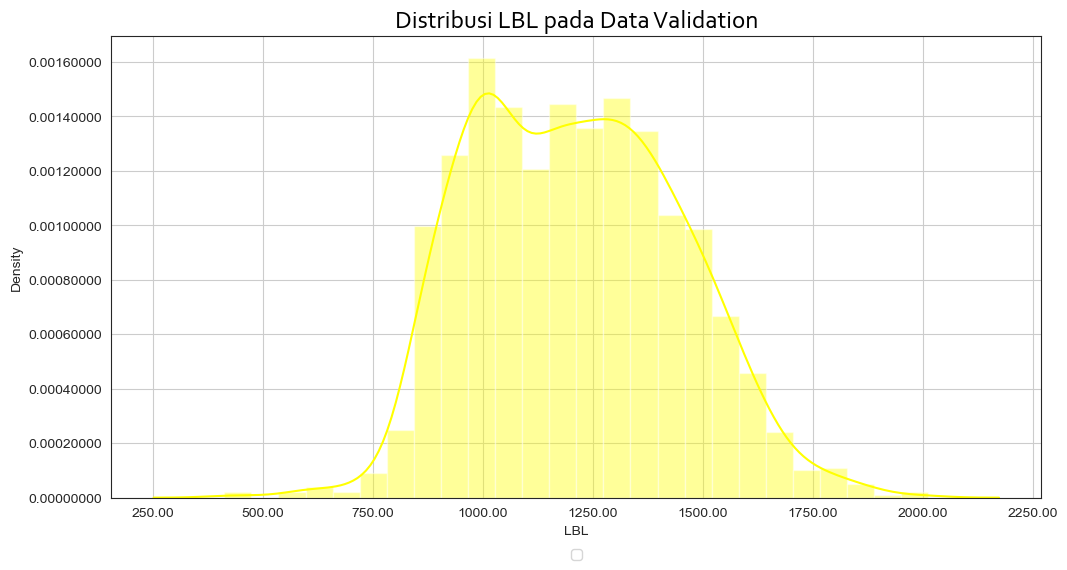

In [68]:
plt.figure(figsize=(12, 6))
sea_plot = sns.distplot(y_val, kde=True, color='yellow')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2f}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.8f}'.format(x)))
sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title('Distribusi LBL pada Data Validation', loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 18})
plt.grid(True)
plt.show()

In [64]:
df_train['datetime_encoded'] = (pd.to_datetime(df_train['datetime']) - pd.Timestamp("2024-01-01")) // pd.Timedelta('1s')
df_test['datetime_encoded'] = (pd.to_datetime(df_test['datetime']) - pd.Timestamp("2024-01-01")) // pd.Timedelta('1s')

In [65]:
X_test = df_test[features]
y_test = df_test['LBL']

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.fit_transform(X_val[features])
X_test_scaled = scaler.transform(X_test[features])
X_scaled = scaler.fit_transform(df_train[features])

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Normalize training target
y_val_scaled = scaler_y.fit_transform(y_val.values.reshape(-1, 1))  # Normalize training target
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)) 
y_scaled = scaler_y.transform(df_train['LBL'].values.reshape(-1, 1)) 

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

In [76]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Predictions
y_pred_val = lr_model.predict(X_val)

# Evaluation
print('Training-Validation Evaluation')
print("Linear Regression MSE:", mean_squared_error(y_val, y_pred_val))
print("Linear Regression R^2:", r2_score(y_val, y_pred_val))

Training-Validation Evaluation
Linear Regression MSE: 10842.853471270459
Linear Regression R^2: 0.8037220955997766


In [74]:
# Predictions
y_pred_test = lr_model.predict(X_test)

# Evaluation
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_test))
print("Linear Regression R^2:", r2_score(y_test, y_pred_test))

Linear Regression MSE: 8502.636610450356
Linear Regression R^2: 0.8135779309335793


## Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
# Predictions
y_pred_val = rf_model.predict(X_val)

# Evaluation
print("Random Forest MSE:", mean_squared_error(y_val, y_pred_val))
print("Random Forest R^2:", r2_score(y_val, y_pred_val))

Random Forest MSE: 4243.806199447513
Random Forest R^2: 0.9231783967462731


In [80]:
# Predictions
y_pred_test = rf_model.predict(X_test)

# Evaluation
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_test))
print("Random Forest R^2:", r2_score(y_test, y_pred_test))

Random Forest MSE: 9038.862959469241
Random Forest R^2: 0.8018210571481973


## XGBoost Regressor

In [81]:
from xgboost import XGBRegressor

In [82]:
# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [84]:
# Predict on test data
y_pred_val = xgb_model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mse = (mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

RMSE: 74.1253
MSE: 5494.5616
R^2 Score: 0.9005


In [85]:
# Predict on test data
y_pred_test = xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mse = (mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

RMSE: 90.7735
MSE: 8239.8366
R^2 Score: 0.8193


In [88]:
# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
# Predict on test data
y_pred_val = xgb_model.predict(X_val_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mse = (mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

RMSE: 102.8450
MSE: 10577.0969
R^2 Score: 0.8085


In [92]:
# Predict on test data
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mse = (mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

RMSE: 98.3605
MSE: 9674.7798
R^2 Score: 0.7879


## LSTM

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [107]:
# LSTM Model Architecture Adjustments: Use Bidirectional LSTM and GRU
lstm_model = Sequential([
    Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    GRU(50, activation='relu'),  # Replacing second LSTM layer with GRU
    Dropout(0.2),
    Dense(1)
])

# Optimizer Tuning: Use RMSprop instead of Adam
optimizer = RMSprop(learning_rate=0.001, rho=0.9)
lstm_model.compile(optimizer=optimizer, loss='mse')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reshape inputs for LSTM (LSTM expects 3D input: [samples, timesteps, features])
X_train_reshaped = X_train_scaled[..., np.newaxis]
X_val_reshaped = X_val_scaled[..., np.newaxis]

# Train the model
history = lstm_model.fit(X_train_reshaped, y_train, 
                         epochs=100, batch_size=32, 
                         validation_data=(X_val_reshaped, y_val), 
                         verbose=2, callbacks=[early_stopping])

Epoch 1/100
204/204 - 9s - 42ms/step - loss: 267619.6875 - val_loss: 52824.4141
Epoch 2/100
204/204 - 2s - 7ms/step - loss: 77871.1875 - val_loss: 81633.5781
Epoch 3/100
204/204 - 1s - 6ms/step - loss: 72325.3906 - val_loss: 37593.7422
Epoch 4/100
204/204 - 1s - 6ms/step - loss: 63794.5195 - val_loss: 59805.2188
Epoch 5/100
204/204 - 1s - 6ms/step - loss: 58662.4531 - val_loss: 32583.5234
Epoch 6/100
204/204 - 2s - 8ms/step - loss: 55960.4219 - val_loss: 26448.0781
Epoch 7/100
204/204 - 2s - 8ms/step - loss: 53886.4922 - val_loss: 25121.3594
Epoch 8/100
204/204 - 2s - 8ms/step - loss: 52125.1367 - val_loss: 51117.7031
Epoch 9/100
204/204 - 1s - 7ms/step - loss: 50731.7773 - val_loss: 92785.3359
Epoch 10/100
204/204 - 1s - 7ms/step - loss: 48652.0664 - val_loss: 27340.7031
Epoch 11/100
204/204 - 2s - 8ms/step - loss: 47897.7539 - val_loss: 23267.0078
Epoch 12/100
204/204 - 2s - 8ms/step - loss: 46762.0039 - val_loss: 22038.5762
Epoch 13/100
204/204 - 1s - 7ms/step - loss: 46616.9180 - v

In [109]:
# Predictions
y_pred_lstm = lstm_model.predict(X_val_reshaped)

# Evaluation (Inverse scale the predictions and target for meaningful evaluation)
#y_val_inv = scaler.inverse_transform(y_val_scaled)
#y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)

# Print MSE
print('Training-Validation')
print("LSTM MSE:", mean_squared_error(y_val, y_pred_lstm))
print("LSTM R^2:", r2_score(y_val, y_pred_lstm))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training-Validation
LSTM MSE: 11606.02491487289
LSTM R^2: 0.7899071259476202


In [111]:
# Predictions
X_test_reshaped = X_test_scaled[..., np.newaxis]

y_pred_test = lstm_model.predict(X_test_reshaped)
# Print MSE
print('Testing')
print("LSTM MSE:", mean_squared_error(y_test, y_pred_test))
print("LSTM R^2:", r2_score(y_test, y_pred_test))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testing
LSTM MSE: 7395.786192071365
LSTM R^2: 0.8378458556485596


## FBProphet

In [112]:
from prophet import Prophet


19:47:24 - cmdstanpy - INFO - Chain [1] start processing
19:47:25 - cmdstanpy - INFO - Chain [1] done processing


      datetime     LBL_pred  yhat_lower   yhat_upper
148 2024-06-05  1141.071992  878.665211  1377.804077
149 2024-06-06  1138.309697  884.561195  1411.743394
150 2024-06-07  1139.879162  892.098358  1410.698892
151 2024-06-08  1136.003548  891.310556  1396.633409
152 2024-06-09  1132.600797  887.880454  1378.210118
..         ...          ...         ...          ...
233 2024-08-29  1058.239809  797.826873  1319.586712
234 2024-08-30  1059.809275  803.360139  1318.981508
235 2024-08-31  1055.933661  798.317273  1310.388629
236 2024-09-01  1052.530909  787.528142  1314.416328
237 2024-09-02  1054.186632  817.634596  1337.385844

[90 rows x 4 columns]


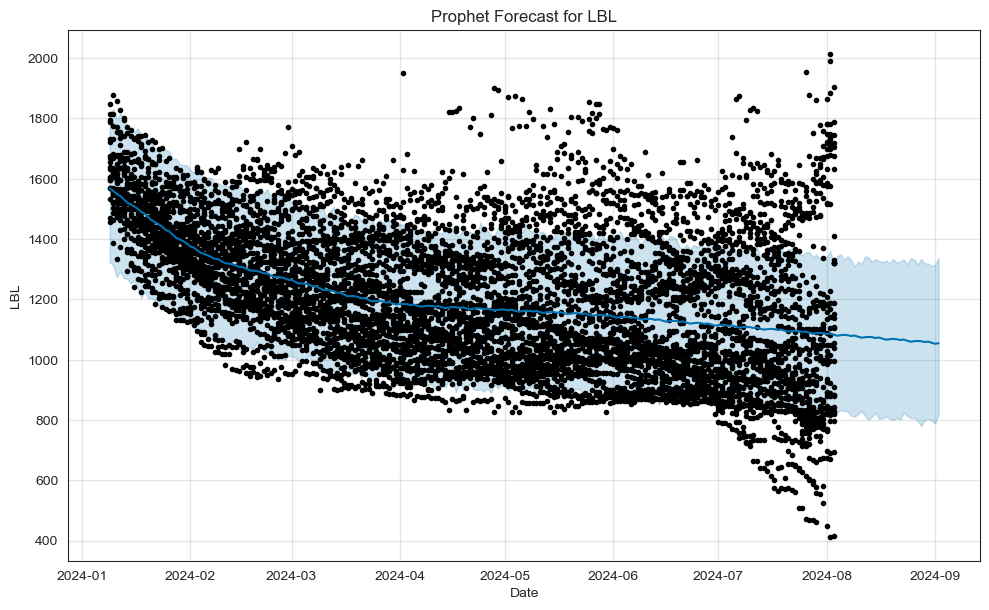

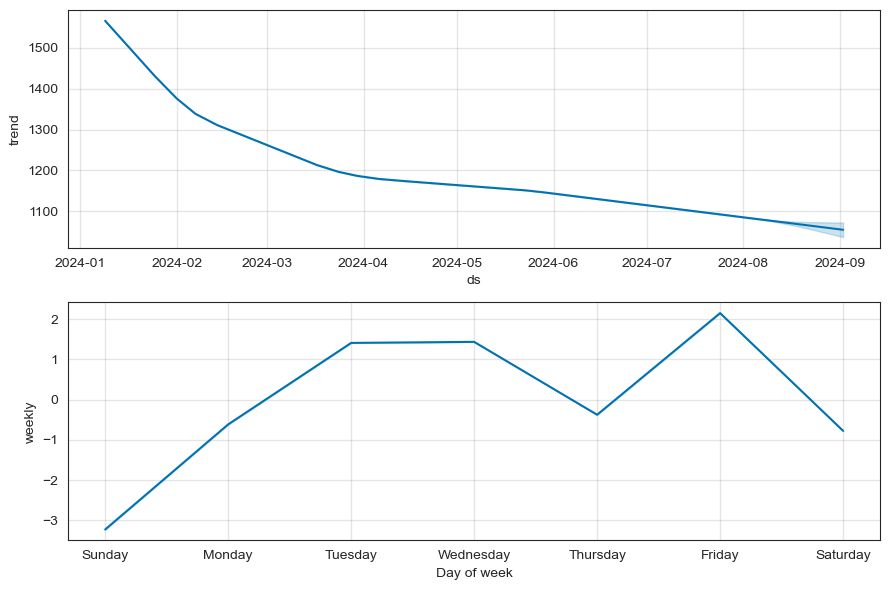

In [113]:

# Prepare the dataset
df_train_prophet = df_train[['datetime', 'LBL']].copy()

# Prophet requires the columns to be renamed: 'ds' for the date column and 'y' for the target variable
df_train_prophet.rename(columns={'datetime': 'ds', 'LBL': 'y'}, inplace=True)

# Initialize and fit the Prophet model
prophet_model = Prophet()

# Fit the model on the training data
prophet_model.fit(df_train_prophet)

# Create a DataFrame for future predictions (90 days)
#future = prophet_model.make_future_dataframe(df_train_prophet, periods=90)
future = prophet_model.make_future_dataframe(periods=30)

# Make the forecast
forecast = prophet_model.predict(future)

# Extract relevant columns (ds: datetime, yhat: prediction, yhat_lower, yhat_upper: prediction intervals)
forecast_result = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Rename for clarity
forecast_result.rename(columns={'ds': 'datetime', 'yhat': 'LBL_pred'}, inplace=True)

# Display the predictions for the next 90 days
print(forecast_result.tail(90))

# Plot the forecast
import matplotlib.pyplot as plt

# Plot the forecast
prophet_model.plot(forecast)
plt.title('Prophet Forecast for LBL')
plt.xlabel('Date')
plt.ylabel('LBL')
plt.show()

# Optionally, you can also plot the forecast components (trend, weekly, yearly seasonality)
prophet_model.plot_components(forecast)
plt.show()

# Future Predictions

## FBProphet

In [132]:
future_prophet_df=df_train_prophet.rename(columns={'y': 'LBL'})
future_prophet_df


ds     LBL
0    2024-01-09  1606.0
1    2024-01-10  1610.0
2    2024-01-11  1587.0
3    2024-01-12  1554.0
4    2024-01-13  1564.0
...         ...     ...
8140 2024-07-28  1650.0
8141 2024-07-29  1626.0
8142 2024-07-30  1596.0
8143 2024-08-01  1781.0
8144 2024-08-02  1749.0

[8145 rows x 2 columns]

In [133]:
forecast_result_2=forecast_result.rename(columns={'datetime':'ds','LBL_pred': 'LBL'})
forecast_result_2

ds          LBL   yhat_lower   yhat_upper
0   2024-01-09  1567.668867  1324.382350  1819.825386
1   2024-01-10  1559.210223  1311.257135  1830.748192
2   2024-01-11  1548.916394  1274.054966  1797.167981
3   2024-01-12  1542.954327  1292.194512  1815.612278
4   2024-01-13  1531.547179  1270.537119  1799.400324
..         ...          ...          ...          ...
233 2024-08-29  1058.239809   797.826873  1319.586712
234 2024-08-30  1059.809275   803.360139  1318.981508
235 2024-08-31  1055.933661   798.317273  1310.388629
236 2024-09-01  1052.530909   787.528142  1314.416328
237 2024-09-02  1054.186632   817.634596  1337.385844

[238 rows x 4 columns]

In [134]:
future_prophet_df=pd.concat([future_prophet_df, forecast_result_2])
future_prophet_df

ds          LBL  yhat_lower   yhat_upper
0   2024-01-09  1606.000000         NaN          NaN
1   2024-01-10  1610.000000         NaN          NaN
2   2024-01-11  1587.000000         NaN          NaN
3   2024-01-12  1554.000000         NaN          NaN
4   2024-01-13  1564.000000         NaN          NaN
..         ...          ...         ...          ...
233 2024-08-29  1058.239809  797.826873  1319.586712
234 2024-08-30  1059.809275  803.360139  1318.981508
235 2024-08-31  1055.933661  798.317273  1310.388629
236 2024-09-01  1052.530909  787.528142  1314.416328
237 2024-09-02  1054.186632  817.634596  1337.385844

[8383 rows x 4 columns]

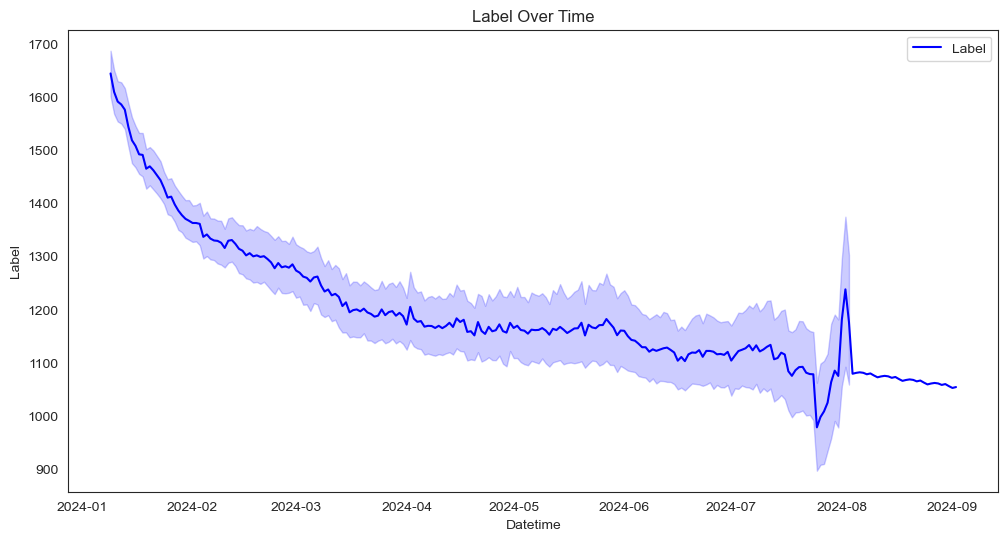

In [135]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=future_prophet_df, x='ds', y='LBL', label='Label', color='blue')
 
# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Label')
plt.title('Label Over Time')
 
plt.show()

# Saving Model

In [149]:
import joblib
import pickle


In [141]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.fit_transform(X_val[features])
X_test_scaled = scaler.transform(X_test[features])
X_scaled = scaler.fit_transform(df_train[features])

In [142]:
scaler = MinMaxScaler()
joblib.dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [153]:
scaler = MinMaxScaler()
scaler.fit(df_all[features])
# Save the fitted scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [143]:
joblib.dump(lr_model, 'linear_regressor.pkl')

['linear_regressor.pkl']

In [144]:
xgb_model.save_model('xgb_model.json')

In [152]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [146]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [147]:
lstm_model.save('lstm_model.h5')

In [150]:
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(prophet_model, f)

In [151]:
features

['storageCost',
 'interestRate',
 'compidx0lt2',
 'sku1',
 'demandseg1',
 'timeunit']

In [155]:
df_all[features+['LBL']].sample(5)

storageCost  interestRate  compidx0lt2    sku1  demandseg1  timeunit  \
2327         30.0           6.0      566.955  1031.0        68.0      82.0   
3447         25.0           9.0      705.410  1640.0        88.0     200.0   
1933         28.0          10.0      535.049   952.0        35.0      89.0   
3130         27.0          11.0     1249.447  1528.0        33.0      82.0   
2775         28.0           9.0      712.257  1093.0        68.0     124.0   

         LBL  
2327  1007.0  
3447  1343.0  
1933   943.0  
3130  1458.0  
2775  1092.0